In [1]:
import os
import gc
from time import time

import natsort
from itertools import count
# import torch
# from pydub import AudioSegment, silence

# Math
from scipy.io import wavfile
import librosa
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

# # Visualization
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D

import librosa.display
from IPython.display import Audio
from IPython.display import HTML

import itertools
import noisereduce as nr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import sklearn

# keras module
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D, Embedding, LSTM, Bidirectional, SimpleRNN, GRU

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

# Hyperparameters
sample_rate = 16000
freq_lim = 2048

In [2]:
import pandas

In [3]:
import os

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import mglearn
from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer,accuracy_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
# import umap
from sklearn.manifold import TSNE

In [4]:
tf.__version__

'2.1.0'

In [5]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15247119872868242839,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14169191742561010966
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12729856674198216451
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:1"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 978019993656168826
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:2"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13735420203159665084
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:3"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8731820068348725014
 physical_device_desc: "device: XLA_GPU device",

In [7]:
for i in range(2):
    gc.collect()
gc.collect()

0

## Test data import

In [12]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/wheeze_counter/test'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['1_clinical(s1_1)_JJY_extrcted.txt',
 '1_clinical(s1_1)_JJY_extrcted.wav',
 '2_clinical(202109301404_1_f)JJY final_extracted.txt',
 '2_clinical(202109301404_1_f)JJY final_extracted.wav',
 '2_clinical(202109301404_1_f)JJY final_extracted_2.txt',
 '2_clinical(202109301404_1_f)JJY final_extracted_2.wav',
 '.ipynb_checkpoints',
 'extracted_clinical.txt',
 'extracted_clinical.wav',
 'infant_wheeze_test3-4.txt',
 'infant_wheeze_test3-4.wav',
 's1_1.wav',
 's2_2.wav',
 's2_3.wav',
 's2_4.wav',
 's2_5.wav']

In [13]:
del ordered_test_file_list[6]

In [14]:
ordered_test_file_list

['1_clinical(s1_1)_JJY_extrcted.txt',
 '1_clinical(s1_1)_JJY_extrcted.wav',
 '2_clinical(202109301404_1_f)JJY final_extracted.txt',
 '2_clinical(202109301404_1_f)JJY final_extracted.wav',
 '2_clinical(202109301404_1_f)JJY final_extracted_2.txt',
 '2_clinical(202109301404_1_f)JJY final_extracted_2.wav',
 'extracted_clinical.txt',
 'extracted_clinical.wav',
 'infant_wheeze_test3-4.txt',
 'infant_wheeze_test3-4.wav',
 's1_1.wav',
 's2_2.wav',
 's2_3.wav',
 's2_4.wav',
 's2_5.wav']

In [15]:
t1, t1_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[7], sr = sample_rate)
t1 = nr.reduce_noise(y=t1, sr=sample_rate)
t1 = t1[:60*16000]
t1_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[6], sep='\t', header=None)


t2, t2_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[1], sr = sample_rate)
t2 = nr.reduce_noise(y=t2, sr=sample_rate)
t2_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[0], sep='\t', header=None)


t3, t3_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[3], sr = sample_rate)
t3 = nr.reduce_noise(y=t3, sr=sample_rate)
t3_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[2], sep='\t', header=None)


t4, t4_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[5], sr = sample_rate)
t4 = nr.reduce_noise(y=t4, sr=sample_rate)
t4_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[4], sep='\t', header=None)

# Funcition definition 

In [16]:
def wheeze_counter_ref(y_pred):
    
    y_pred_0 = y_pred[:,0]
    y_pred_1 = y_pred[:,1]
    y_pred_2 = y_pred[:,2]

    resp_list_index = []

    ex_index = 0

    # for peak_index in peaks:

    #     if (peak_index - ex_peak_index) >= 100: 
    #         resp_list.append([ex_peak_index, peak_index])
    #     ex_peak_index = peak_index

    for index, y_pred_categorical in enumerate(y_pred.argmax(axis=1)):

        if (y_pred_categorical) >= 1:

            if (index - ex_index) >= 50: 
                resp_list_index.append(ex_index)
                resp_list_index.append(index)

            ex_index = index

    for reverse_index, y_pred_categorical in enumerate(reversed(y_pred.argmax(axis=1))):

        if (y_pred_categorical) >= 1:

            resp_list_index.append(len(y_pred.argmax(axis=1))-(reverse_index+1))
            resp_list_index = resp_list_index[1:]

            break


    number = 0
    count_label = []
    
    for i in np.arange(len(resp_list_index)//2):

        number+=1

        start_index = resp_list_index[i*2:(i+1)*2][0]
        end_index = resp_list_index[i*2:(i+1)*2][1]

        prob_norm_in_resp = y_pred_1[start_index:end_index+1]    
        prob_wheeze_in_resp = y_pred_2[start_index:end_index+1]
        categorical_in_resp = y_pred.argmax(axis=1)[start_index:end_index+1]

        score = 0

        for pred_val in categorical_in_resp:

            if score == 3:
                count_label.append(1)
                
                break

            elif pred_val == 2:
                score += 1

            else :
                score = 0
        
        else :
            count_label.append(0)
        
        
#         for pred_val in categorical_in_resp:

#             if score == 3:
#                 break

#             if pred_val == 2:
#                 score += 1

#             else :
#                 score = 0
        
#         if score == 3:
#             count_label.append(1)
#         else :
#             count_label.append(0)

        print('#', number, ':', 'score:', score, np.average(prob_norm_in_resp), np.average(prob_wheeze_in_resp), 
              np.std(prob_norm_in_resp), np.std(prob_wheeze_in_resp))
        
    return count_label
        

In [17]:
def wheeze_counter_test(y_pred):

    y_pred_0 = y_pred[:,0]
    y_pred_1 = y_pred[:,1]
    y_pred_2 = y_pred[:,2]
    
    resp_list_index = []

    ex_index = 0

    # for peak_index in peaks:

    #     if (peak_index - ex_peak_index) >= 100: 
    #         resp_list.append([ex_peak_index, peak_index])
    #     ex_peak_index = peak_index

    for index, y_pred_categorical in enumerate(y_pred.argmax(axis=1)):

        if (y_pred_categorical) >= 1:

            if (index - ex_index) >= 100: 
                resp_list_index.append(ex_index)
                resp_list_index.append(index)

            ex_index = index

    for reverse_index, y_pred_categorical in enumerate(reversed(y_pred.argmax(axis=1))):

        if (y_pred_categorical) >= 1:

            resp_list_index.append(len(y_pred.argmax(axis=1))-(reverse_index+1))
            resp_list_index = resp_list_index[1:]

            break


    number = 0
    count_label = []
    
    for i in np.arange(len(resp_list_index)//2):

        number+=1

        start_index = resp_list_index[i*2:(i+1)*2][0]
        end_index = resp_list_index[i*2:(i+1)*2][1]

        prob_norm_in_resp = y_pred_1[start_index:end_index+1]    
        prob_wheeze_in_resp = y_pred_2[start_index:end_index+1]
        categorical_in_resp = y_pred.argmax(axis=1)[start_index:end_index+1]

        score = 0

        for pred_val in categorical_in_resp:

            if score == 3:
                count_label.append(1)
                
                break

            elif pred_val == 2:
                score += 1

            else :
                score = 0
        
        else :
            count_label.append(0)

        print('#', number, ':', 'score:', score, np.average(prob_norm_in_resp), np.average(prob_wheeze_in_resp), 
              np.std(prob_norm_in_resp), np.std(prob_wheeze_in_resp))
        
    return count_label
        

In [18]:
def make_validation_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):


    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
    y = utils.to_categorical(y)
    
    return X, y


def make_test_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):


    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
            data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 'n':
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 'w':
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
    y = utils.to_categorical(y)
    
    return X, y



def make_validation_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):

    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_validation_dataset(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):


    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
    y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y



def make_test_dataset(test_signal, test_label, n_mels, frame_sec, step_sec):
    
    # test signal must be noise filtered

    # framing condition
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
    
#     # noise reduce
#     test_signal = nr.reduce_noise(test_signal, sr = sample_rate)

    # mel spectrogram extraction
    melS = librosa.feature.melspectrogram(y = test_signal, sr=sample_rate, 
                                          n_mels=n_mels, hop_length=frame_step, win_length=frame_length)
    melS = librosa.power_to_db(melS, ref=np.max)
#     melS = librosa.power_to_db(melS, ref=np.median)

    X_test = melS.T
    
    sec_to_index = test_label[0]*16000
    event_index = sec_to_index//(step_sec*sample_rate)

    y_test = np.zeros(len(X_test))

    for i in event_index:
        y_test[int(i)] = 2
        
    return X_test, y_test


def wheeze_per_resp_acc(y_pred, y_test):
    
    peaks, _ = find_peaks(y_pred)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    pred_resp_count = 0
    pred_normal_count = 0
    pred_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            pred_resp_count += 1
            thres = y_pred[peaks[start:index+1]].mean()
            
            print('#'+str(index)+':', thres)
            
            if thres >= 1.5:
                pred_wheeze_count += 1
            elif thres < 1.5 : 
                pred_normal_count += 1
            start = index+1
    
    print('prediction')
    print('respiration:', pred_resp_count)
    print('wheeze:' , pred_wheeze_count, 'normal', pred_normal_count)
    
    peaks, _ = find_peaks(y_test)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    test_resp_count = 0
    test_normal_count = 0
    test_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            test_resp_count += 1
            thres = y_test[peaks[start:index+1]].mean()
            
            print('#'+str(index)+':', thres)            
            
            if thres >= 1.5:
                test_wheeze_count += 1
            elif thres < 1.5 : 
                test_normal_count += 1
            start = index+1
             
    print('test')
    print('respiration:', test_resp_count)
    print('wheeze:' , test_wheeze_count, 'normal', test_normal_count)
    
#     return pred_wheeze_count, pred_resp_count



def Count_algorithm(y_true, y_prob):
    
    y_prob_categorical = y_prob.argmax(axis=1)
    

def wheeze_per_resp_acc(y_pred, y_test):
    
    peaks, _ = find_peaks(y_pred)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    pred_resp_count = 0
    pred_normal_count = 0
    pred_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            pred_resp_count += 1
            thres = y_pred[peaks[start:index+1]].mean()
            
            print('#'+str(index)+':', thres)
            
            if thres >= 1.5:
                pred_wheeze_count += 1
            elif thres < 1.5 : 
                pred_normal_count += 1
            start = index+1
    
    print('prediction')
    print('respiration:', pred_resp_count)
    print('wheeze:' , pred_wheeze_count, 'normal', pred_normal_count)
    
    peaks, _ = find_peaks(y_test)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    test_resp_count = 0
    test_normal_count = 0
    test_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            test_resp_count += 1
            thres = y_test[peaks[start:index+1]].mean()
            
            print('#'+str(index)+':', thres)            
            
            if thres >= 1.5:
                test_wheeze_count += 1
            elif thres < 1.5 : 
                test_normal_count += 1
            start = index+1
             
    print('test')
    print('respiration:', test_resp_count)
    print('wheeze:' , test_wheeze_count, 'normal', test_normal_count)
    
#     return pred_wheeze_count, pred_resp_count

## fixed parameter results

In [19]:
file_path= 'data/raw data/wheeze_counter/train'

file_list = os.listdir(file_path)
ordered_file_list = natsort.natsorted(file_list)

ordered_file_list

['.ipynb_checkpoints',
 'normal_littmann_3cycles.txt',
 'normal_littmann_3cycles.wav',
 'normal_sim_10cycles.txt',
 'normal_sim_10cycles.wav',
 'wheeze_clinical.txt',
 'wheeze_clinical.wav',
 'wheeze_expiratory_littmann_3cycles.txt',
 'wheeze_expiratory_littmann_3cycles.wav',
 'wheeze_low_pitch_littmann_3cycles.txt',
 'wheeze_low_pitch_littmann_3cycles.wav',
 'wheeze_monophonic_littmann_3cycles.txt',
 'wheeze_monophonic_littmann_3cycles.wav',
 'wheeze_sim_7cycles.txt',
 'wheeze_sim_7cycles.wav']

In [20]:
ordered_file_list = ordered_file_list[1:]
ordered_file_list

['normal_littmann_3cycles.txt',
 'normal_littmann_3cycles.wav',
 'normal_sim_10cycles.txt',
 'normal_sim_10cycles.wav',
 'wheeze_clinical.txt',
 'wheeze_clinical.wav',
 'wheeze_expiratory_littmann_3cycles.txt',
 'wheeze_expiratory_littmann_3cycles.wav',
 'wheeze_low_pitch_littmann_3cycles.txt',
 'wheeze_low_pitch_littmann_3cycles.wav',
 'wheeze_monophonic_littmann_3cycles.txt',
 'wheeze_monophonic_littmann_3cycles.wav',
 'wheeze_sim_7cycles.txt',
 'wheeze_sim_7cycles.wav']

In [21]:
val_file_path= 'data/raw data/wheeze_counter/validation'

val_file_list = os.listdir(val_file_path)
val_ordered_file_list = natsort.natsorted(val_file_list)

val_ordered_file_list

['normal_littmann_1cycle.txt',
 'normal_littmann_1cycle.wav',
 'normal_sim_2cycles.txt',
 'normal_sim_2cycles.wav',
 'wheeze_clinical_validation.txt',
 'wheeze_clinical_validation.wav',
 'wheeze_expiratory_littmann_1cycle.txt',
 'wheeze_expiratory_littmann_1cycle.wav',
 'wheeze_low_pitch_littmann_1cycle.txt',
 'wheeze_low_pitch_littmann_1cycle.wav',
 'wheeze_monophonic_littmann_1cycle.txt',
 'wheeze_monophonic_littmann_1cycle.wav',
 'wheeze_sim_2cycles.txt',
 'wheeze_sim_2cycles.wav']

In [31]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
label_ratio = 1

# X, y = make_train_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
# X_val, y_val = make_validation_dataset_keras(val_file_path, val_ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
X_train, y_train = make_train_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
X_test, y_test = make_validation_dataset_keras(val_file_path, val_ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
#%% Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
# n_timesteps, n_features, n_outputs = X.shape[1], X.shape[2], y.shape[1]

## 1d CNN + bLSTM 

In [37]:
model = load_model('saved_model/220718_1dcnn_blstm_revised.h5')

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 113, 32)           544       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 32)            16416     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               591872    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [39]:
y_pred = model.predict(X_test)

In [44]:
acc =accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1))
f1=f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')

roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)
print(cm2)

acc: 0.9050931677018633
f1: 0.9057593582823728
roc_auc: 0.9763147705668693
[[0.95445303 0.0093534  0.03619357]
 [0.02698145 0.84485666 0.12816189]
 [0.0626927  0.12024666 0.81706064]]
[[2347   23   89]
 [  16  501   76]
 [  61  117  795]]


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[2347,   23,   89],
       [  16,  501,   76],
       [  61,  117,  795]])

In [50]:
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
    

class_names = ['Break', 'Normal', 'Wheeze']
classifier = estimator(model, class_names)

Confusion matrix, without normalization
[[2347   23   89]
 [  16  501   76]
 [  61  117  795]]
Normalized confusion matrix
[[0.95445303 0.0093534  0.03619357]
 [0.02698145 0.84485666 0.12816189]
 [0.0626927  0.12024666 0.81706064]]


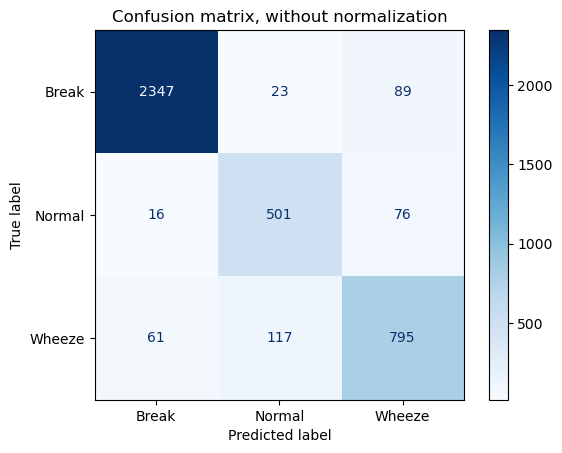

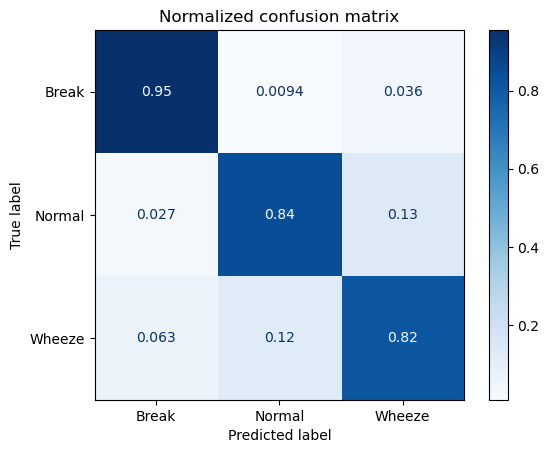

In [57]:
title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test.argmax(axis=1),
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)
    
    if normalize == None:
        plt.savefig('svg_images/230426_CM_wo_Norm.svg')
        
    else:
        plt.savefig('svg_images/230426_CM_w_Norm.svg')

plt.show()

In [41]:
y_pred_0 = y_pred[:,0]
y_pred_1 = y_pred[:,1]
y_pred_2 = y_pred[:,2]

y_test_0 = y_test[:,0]
y_test_1 = y_test[:,1]
y_test_2 = y_test[:,2]

In [42]:
len(y_pred_0)

4025

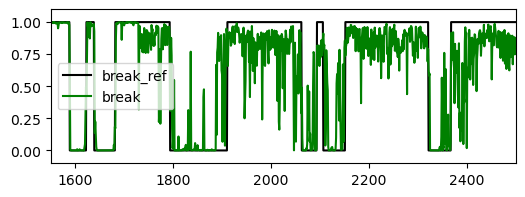

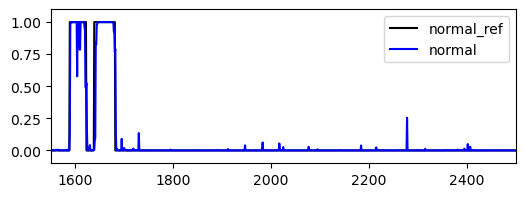

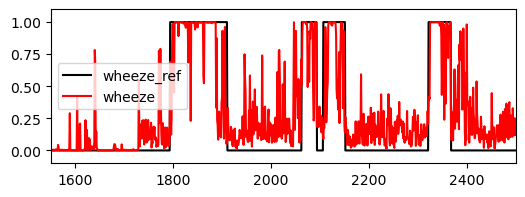

In [43]:
view_start = 1550
view_end = 2500

# x = np.arange(len(y_test_0))

plt.figure(figsize=(6,2))
plt.plot(y_test_0, label='break_ref', color='black')
plt.plot(y_pred_0, label='break', color='g')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
# plt.savefig('svg_images/figure6-2_break.svg')

plt.figure(figsize=(6,2))
plt.plot(y_test_1, label='normal_ref', color='black')
plt.plot(y_pred_1, label='normal', color='b')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
# plt.savefig('svg_images/figure6-2_normal.svg')

plt.figure(figsize=(6,2))
plt.plot(y_test_2, label='wheeze_ref', color='black')
plt.plot(y_pred_2, label='wheeze', color='r')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
# plt.savefig('svg_images/figure6-2_wheeze.svg')

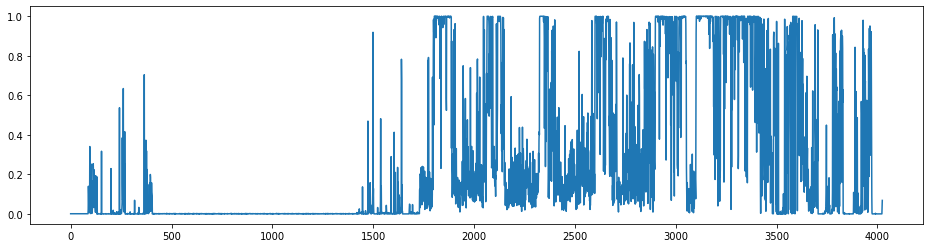

In [29]:
plt.figure(figsize=(16,4))
plt.plot(y_pred_2)

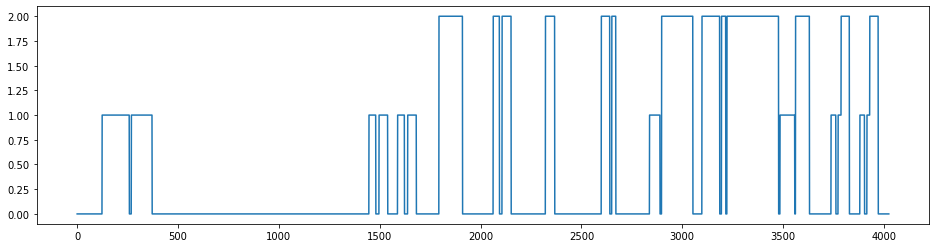

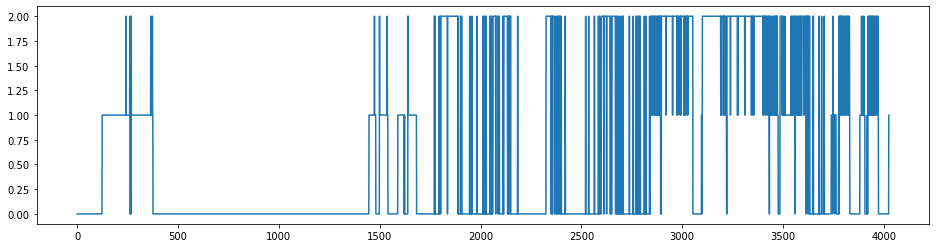

In [30]:
plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))

In [31]:
ref_count_label = wheeze_counter_ref(y_test)

# 1 : score: 0 0.9596774 0.0 0.19671467 0.0
# 2 : score: 0 0.827957 0.0 0.37741786 0.0
# 3 : score: 0 0.827957 0.0 0.37741786 0.0
# 4 : score: 3 0.0 1.0 0.0 0.0
# 5 : score: 3 0.0 0.85393256 0.0 0.35317382
# 6 : score: 3 0.0 1.0 0.0 0.0
# 7 : score: 3 0.0 0.8611111 0.0 0.34583056
# 8 : score: 3 0.15762925 0.74274904 0.364393 0.4371189
# 9 : score: 3 0.42857143 0.45054945 0.49487165 0.49754858
# 10 : score: 3 0.4065934 0.46153846 0.49119774 0.49851856


In [32]:
test_count_label = wheeze_counter_test(y_pred)

# 1 : score: 0 0.9502259 0.023297492 0.17908953 0.088584036
# 2 : score: 3 0.1964944 0.28550518 0.38623518 0.37024057
# 3 : score: 3 0.0014138372 0.6204546 0.005976847 0.35286695
# 4 : score: 3 0.16842513 0.49420506 0.3002608 0.40667832


In [36]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/wheeze_counter/'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['220307_wheeze_label_test.txt',
 '220307_wheeze_test.wav',
 '.ipynb_checkpoints',
 'test',
 'train',
 'train_dB_control',
 'train_re',
 'validation',
 'validation_combined_audio.wav',
 'volume_normalization']

In [39]:
t, t_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[-2], sr = sample_rate)
t = nr.reduce_noise(y=t, sr=sample_rate)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

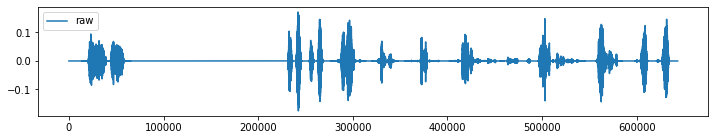

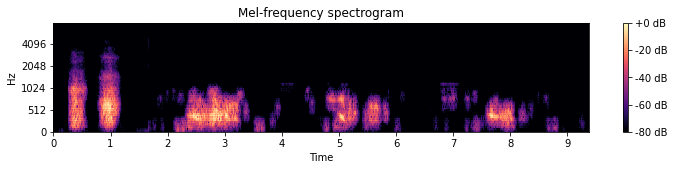

In [41]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
# step_sec = 0.025
label_ratio = 1

plt.figure(figsize=(12,2))
plt.plot(t, label='raw')
# plt.xlim(250000, 400000)
plt.legend()
# plt.savefig('svg_images/fig6_1.svg')

fig, ax = plt.subplots(figsize=(12,2))
S = librosa.feature.melspectrogram(y=t[250000:400000], sr=16000, n_mels=n_mels, n_fft=400, hop_length=160)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, hop_length=160, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
# plt.savefig('svg_images/fig6_2.svg')

## Test with clinical 

In [23]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/mamoori/test/s1_1'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['1_clinical(s1_1)_JJY_extrcted_ISH.txt',
 '1_clinical(s1_1)_JJY_extrcted_ISH.wav',
 '1_clinical(s1_1)_JJY_extrcted_ISH_volume_up.txt',
 '1_clinical(s1_1)_JJY_extrcted_ISH_volume_up.wav',
 '.ipynb_checkpoints']

In [24]:
t, t_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[3], sr = sample_rate)
# t = nr.reduce_noise(y=t, sr=sample_rate)
t_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[2], sep='\t', header=None)

In [25]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
# step_sec = 0.025
label_ratio = 1

X_test, y_test = make_test_dataset_keras(test_file_path, ordered_test_file_list, n_mels, frame_sec, step_sec, label_ratio)

In [26]:
# model = load_model('saved_model/220706_1dcnn_blstm.h5')
model = load_model('saved_model/220718_1dcnn_blstm_revised.h5')

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_test.shape

(26499, 3)

In [29]:
y_pred.shape

(26499, 3)

In [30]:
acc =accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1))
f1=f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')

roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)

acc: 0.7028567115740216
f1: 0.6190866862816111
roc_auc: 0.68225591995342
[[0.96826421 0.02544242 0.00629337]
 [0.96639899 0.02176669 0.01183432]
 [0.74464736 0.09130982 0.16404282]]


In [31]:
y_pred_0 = y_pred[:,0]
y_pred_1 = y_pred[:,1]
y_pred_2 = y_pred[:,2]

y_test_0 = y_test[:,0]
y_test_1 = y_test[:,1]
y_test_2 = y_test[:,2]

In [32]:
# count_label = np.zeros(len(y_pred.argmax(axis=1)))
# whz_score = 0
# for index, label in enumerate(y_pred.argmax(axis=1)):
    
#     if whz_score == 3:
#         count_label[index] = 1
#         whz_score = 0
    
#     elif label == 2:
#         whz_score += 1
        
#     else:
#         whz_score = 0
        
        
count_label = np.zeros(len(y_pred.argmax(axis=1)))
whz_score = 0
whz_score_tracking = []
for index, prob in enumerate(y_pred_2):
    
    if whz_score == 5: # 3 -> 2 -> 1 -> 4 -> 5
        count_label[index] = 1
        whz_score = 0
    
    elif prob >= 0.6:
        whz_score += 1
        
    else:
        whz_score = 0
        
    whz_score_tracking.append(whz_score)

    
break_count_label = np.zeros(len(y_pred.argmax(axis=1)))
break_score = 0
break_score_tracking = []
for index_0, prob_0 in enumerate(y_pred_0):
    
    if break_score == 3:
        break_count_label[index] = 1
        break_score = 0
    
    elif prob_0 >= 0.6:
        break_score += 1
        
    else:
        break_score = 0
        
    break_score_tracking.append(break_score)

In [33]:
print(len(whz_score_tracking))

26499


In [34]:
print(len(break_score_tracking))

26499


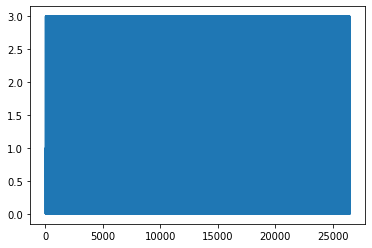

In [35]:
plt.plot(break_score_tracking)

(12000.0, 14000.0)

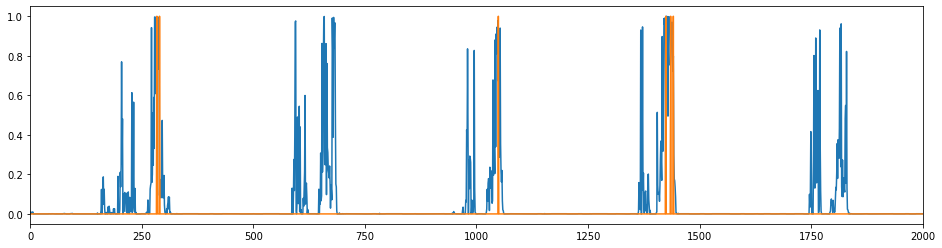

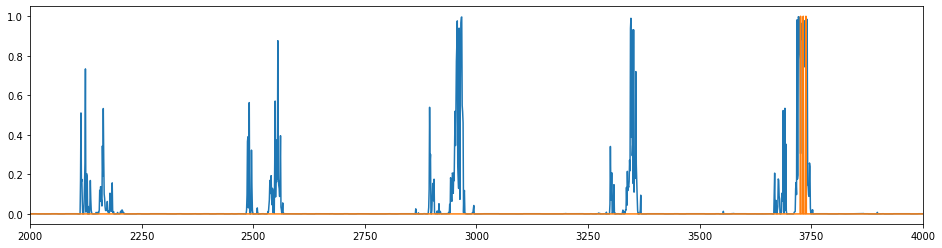

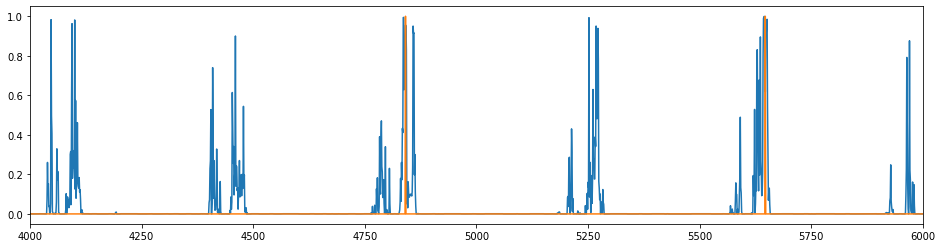

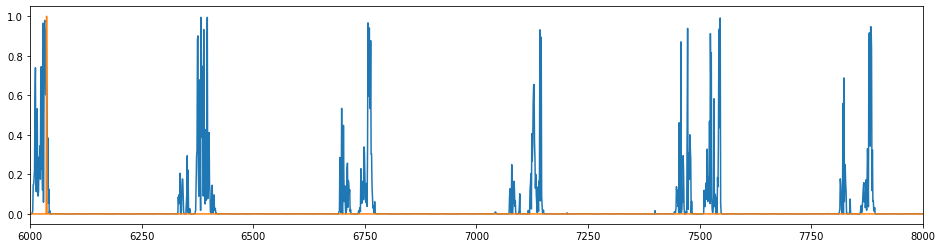

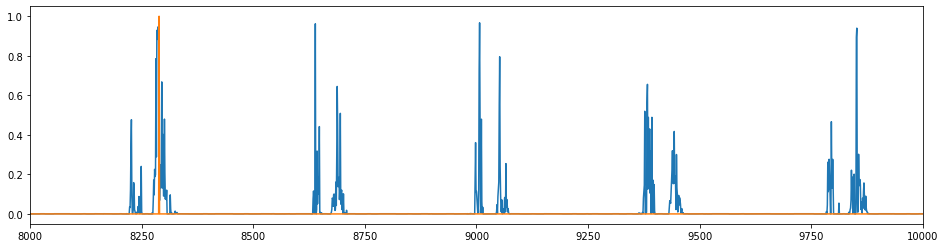

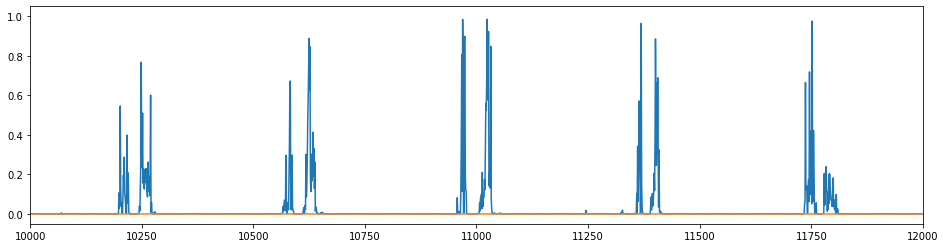

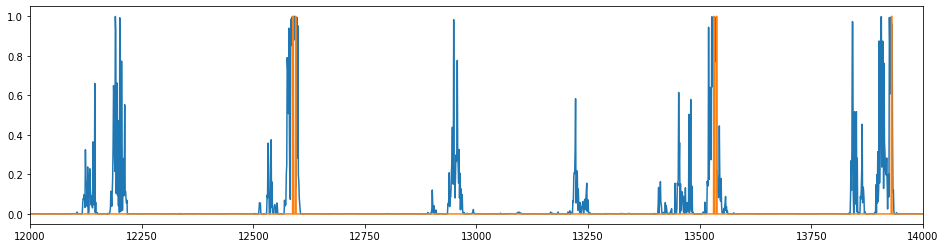

In [36]:
plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(0,2000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(2000,4000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(4000,6000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(6000,8000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(8000,10000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(10000,12000)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(count_label)
plt.xlim(12000,14000)

In [37]:
raw_data_zero_pad = t.tolist()+[0]*(400 - len(t)%160)
raw_data_zero_pad = np.array(raw_data_zero_pad)

In [38]:
len(raw_data_zero_pad)

2119920

In [39]:
len(t)//160 + 1

13248

In [40]:
y_pred_2_sync = np.zeros(len(raw_data_zero_pad))
y_pred_1_sync = np.zeros(len(raw_data_zero_pad))
y_pred_0_sync = np.zeros(len(raw_data_zero_pad))
y_test_sync = np.zeros(len(raw_data_zero_pad))
y_test_2_sync = np.zeros(len(raw_data_zero_pad))
count_label_sync = np.zeros(len(raw_data_zero_pad))
whz_score_tracking_sync = np.zeros(len(raw_data_zero_pad))
break_score_tracking_sync = np.zeros(len(raw_data_zero_pad))


for i in range(len(t)//160 + 1):
    start = i*160
    end = start+400
    mid = (start+end)//2
    
    y_pred_2_sync[mid] = y_pred_2[i]
    y_pred_1_sync[mid] = y_pred_1[i]
    y_pred_0_sync[mid] = y_pred_0[i]
    y_test_sync[mid] = y_test.argmax(axis=1)[i]
    y_test_2_sync[mid] = y_test_2[i]
    count_label_sync[mid] = count_label[i]
    whz_score_tracking_sync[mid] = whz_score_tracking[i]
    break_score_tracking_sync[mid] = break_score_tracking[i]

In [41]:
print(len(raw_data_zero_pad), len(y_pred_2_sync), len(y_test_sync), len(y_test_2_sync), len(count_label_sync))

2119920 2119920 2119920 2119920 2119920


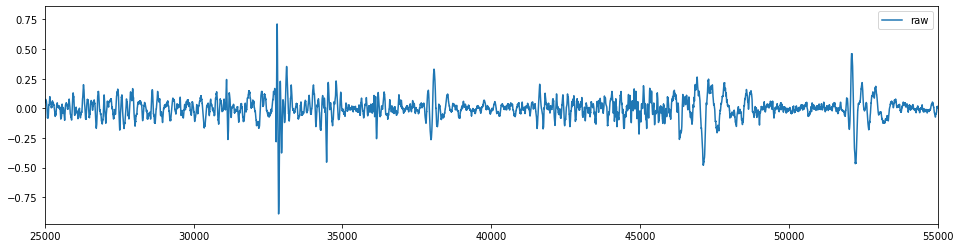

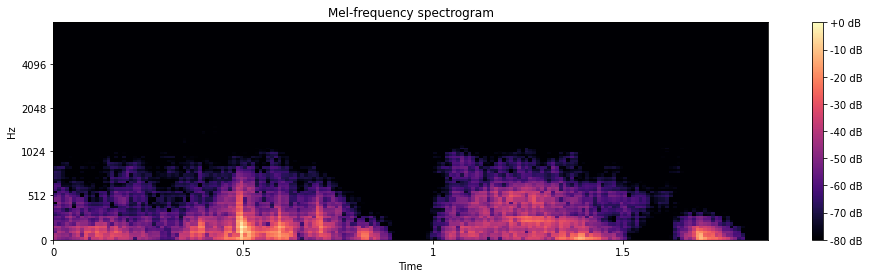

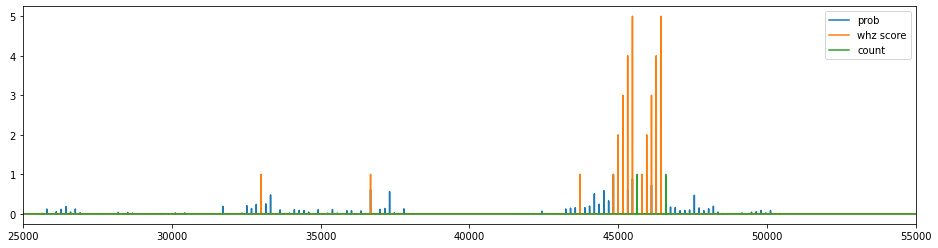

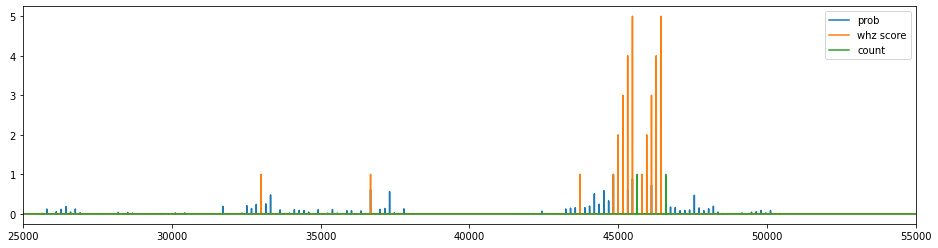

/home/mostlab/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


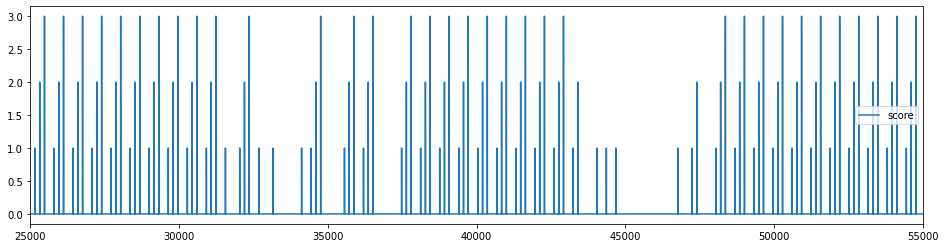

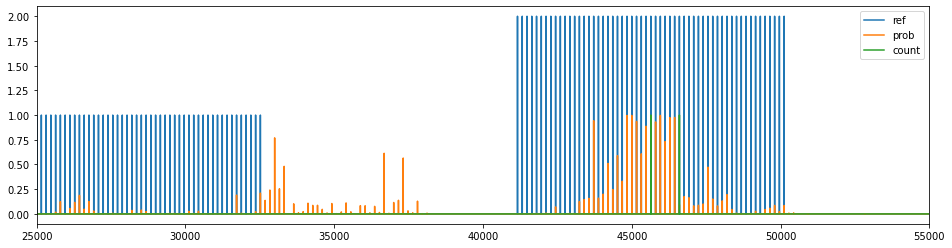

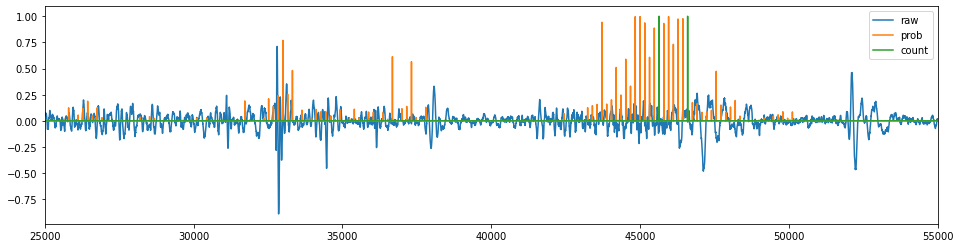

In [42]:
plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig6_3.svg')

fig, ax = plt.subplots(figsize=(16,4))
nr_raw_data_zero_pad = nr.reduce_noise(raw_data_zero_pad, sr=16000)
S = librosa.feature.melspectrogram(y=nr_raw_data_zero_pad[25000:55000], sr=16000, n_mels=n_mels, n_fft=400, hop_length=160)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, hop_length=160, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
# plt.savefig('svg_images/fig6_4.svg')

plt.figure(figsize=(16,4))
# plt.plot(y_test_2_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(whz_score_tracking_sync, label='whz score')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig7_3.svg')

plt.figure(figsize=(16,4))
# plt.plot(y_test_2_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(whz_score_tracking_sync, label='whz score')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig7_4.svg')

plt.figure(figsize=(16,4))
# plt.plot(y_test_2_sync, label='ref')
# plt.plot(y_pred_0_sync, label='prob')
plt.plot(break_score_tracking_sync, label='score')
# plt.plot(whz_score_tracking_sync, label='whz score')
# plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig7_5.svg')

plt.figure(figsize=(16,4))
plt.plot(y_test_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()

<ipython-input-43-92b57f255701>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('svg_images/fig7_thres_5.svg')


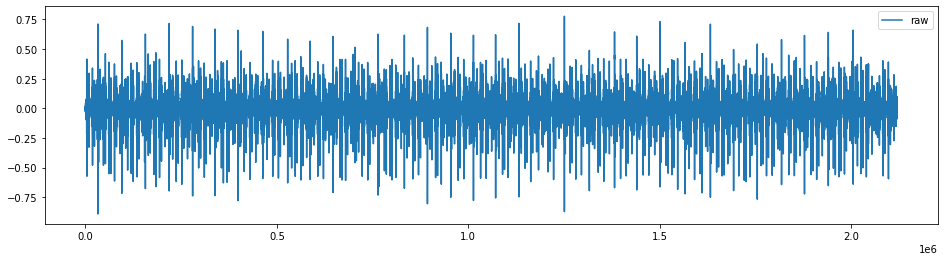

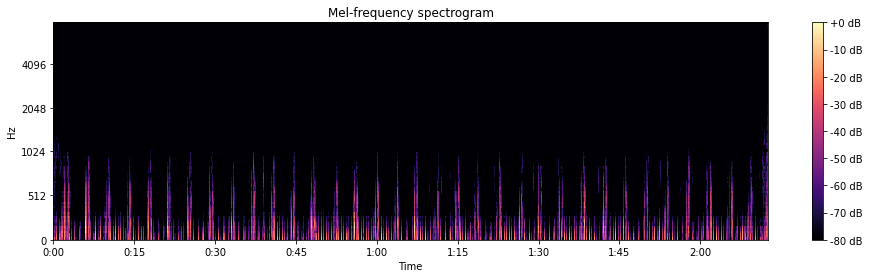

/home/mostlab/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


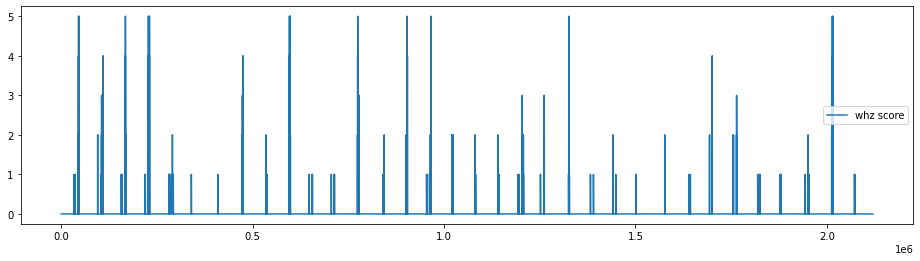

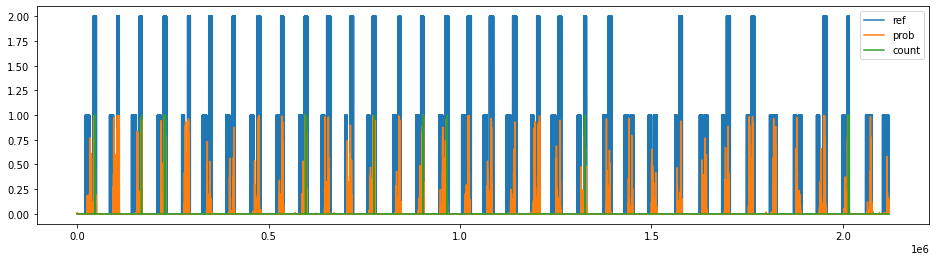

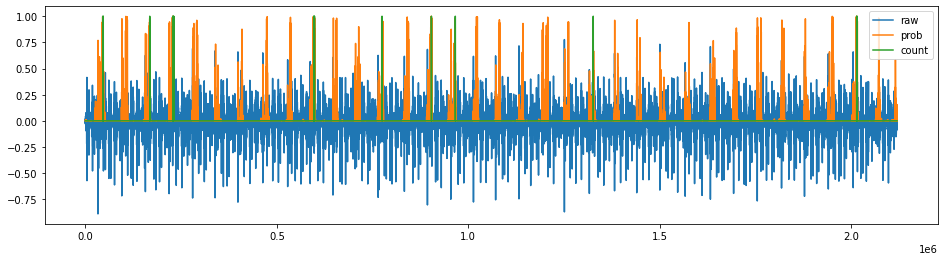

In [43]:
plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
# plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig8_1.svg')

fig, ax = plt.subplots(figsize=(16,4))
nr_raw_data_zero_pad = nr.reduce_noise(raw_data_zero_pad, sr=16000)
S = librosa.feature.melspectrogram(y=nr_raw_data_zero_pad, sr=16000, n_mels=n_mels, n_fft=400, hop_length=160)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, hop_length=160, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
# plt.savefig('svg_images/fig8_2.svg')

plt.figure(figsize=(16,4))
plt.plot(whz_score_tracking_sync, label='whz score')
# plt.plot(y_test_2_sync, label='ref')
# plt.plot(y_pred_2_sync, label='prob', color='red')
# plt.plot(count_label_sync, label='count', color='black')
# plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig7_thres_5.svg')

plt.figure(figsize=(16,4))
plt.plot(y_test_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
# plt.xlim(25000, 55000)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
# plt.xlim(25000, 55000)
plt.legend()

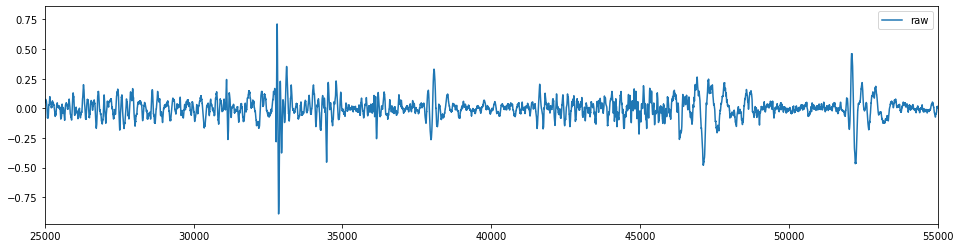

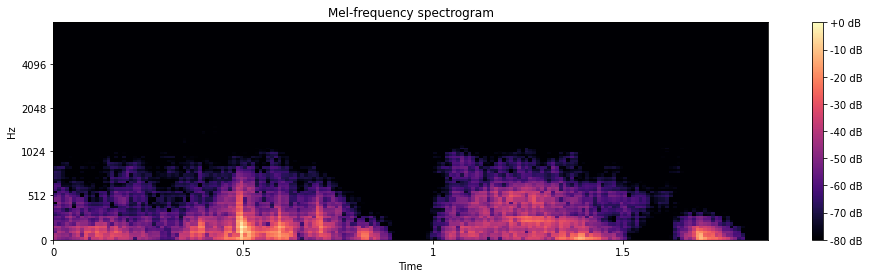

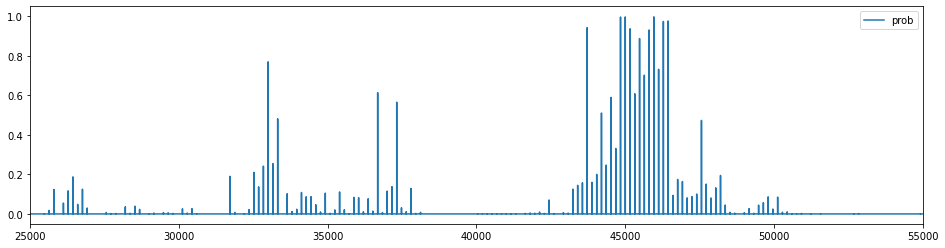

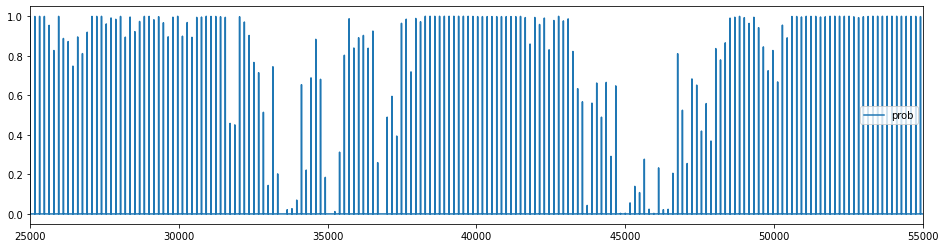

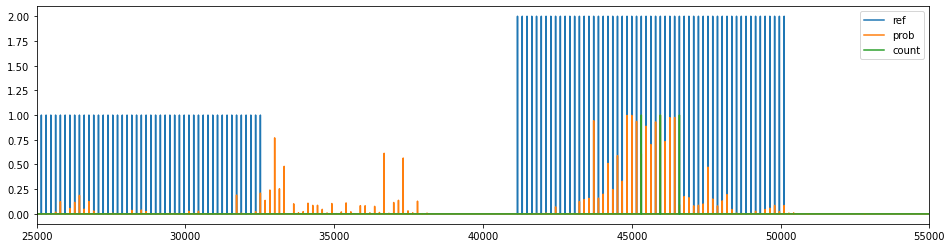

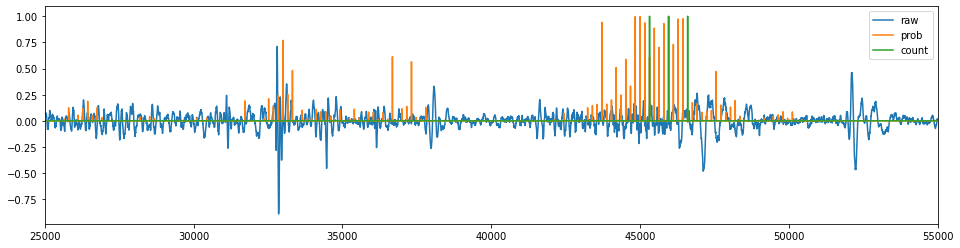

In [58]:
plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
plt.xlim(25000, 55000)
plt.legend()
# plt.savefig('svg_images/fig8_1.svg')

fig, ax = plt.subplots(figsize=(16,4))
nr_raw_data_zero_pad = nr.reduce_noise(raw_data_zero_pad, sr=16000)
S = librosa.feature.melspectrogram(y=nr_raw_data_zero_pad[25000:55000], sr=16000, n_mels=n_mels, n_fft=400, hop_length=160)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, hop_length=160, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
# plt.savefig('svg_images/fig8_2.svg')

plt.figure(figsize=(16,4))
# plt.plot(y_test_2_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
# plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()
plt.savefig('svg_images/fig8_3.svg')

plt.figure(figsize=(16,4))
# plt.plot(y_test_2_sync, label='ref')
plt.plot(y_pred_0_sync, label='prob')
# plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()
plt.savefig('svg_images/fig8_5.svg')

plt.figure(figsize=(16,4))
plt.plot(y_test_sync, label='ref')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(raw_data_zero_pad, label='raw')
plt.plot(y_pred_2_sync, label='prob')
plt.plot(count_label_sync, label='count')
plt.xlim(25000, 55000)
plt.legend()

In [59]:
print(raw_data_zero_pad.shape, y_pred_2_sync.shape, count_label_sync.shape)

(2119920,) (2119920,) (2119920,)


In [60]:
stacked = np.hstack((raw_data_zero_pad.reshape(-1,1), y_pred_2_sync.reshape(-1,1), count_label_sync.reshape(-1,1)))

In [61]:
df = pd.DataFrame(stacked, columns=['raw_data', 'prob', 'count'])

In [62]:
df_part1 = df.iloc[:1000000]
df_part2 = df.iloc[1000000:2000000]
df_part3 = df.iloc[2000000:]

In [63]:
df

,raw_data,prob,count
0,0.008118,0.0,0.0
1,0.006683,0.0,0.0
2,0.007141,0.0,0.0
3,0.004425,0.0,0.0
4,0.003723,0.0,0.0
...,...,...,...
2119915,0.000000,0.0,0.0
2119916,0.000000,0.0,0.0
2119917,0.000000,0.0,0.0
2119918,0.000000,0.0,0.0


In [64]:
df_part1

,raw_data,prob,count
0,0.008118,0.0,0.0
1,0.006683,0.0,0.0
2,0.007141,0.0,0.0
3,0.004425,0.0,0.0
4,0.003723,0.0,0.0
...,...,...,...
999995,0.057922,0.0,0.0
999996,0.057709,0.0,0.0
999997,0.061615,0.0,0.0
999998,0.063599,0.0,0.0


In [65]:
df_part2

,raw_data,prob,count
1000000,0.069061,0.0,0.0
1000001,0.071930,0.0,0.0
1000002,0.073273,0.0,0.0
1000003,0.075134,0.0,0.0
1000004,0.076935,0.0,0.0
...,...,...,...
1999995,-0.050598,0.0,0.0
1999996,-0.053680,0.0,0.0
1999997,-0.058685,0.0,0.0
1999998,-0.060883,0.0,0.0


In [66]:
df_part3

,raw_data,prob,count
2000000,-0.067322,0.0,0.0
2000001,-0.068970,0.0,0.0
2000002,-0.072540,0.0,0.0
2000003,-0.074646,0.0,0.0
2000004,-0.077637,0.0,0.0
...,...,...,...
2119915,0.000000,0.0,0.0
2119916,0.000000,0.0,0.0
2119917,0.000000,0.0,0.0
2119918,0.000000,0.0,0.0


In [815]:
df_part1.to_csv('real_time_plotting_part1.csv')
df_part2.to_csv('real_time_plotting_part2.csv')
df_part3.to_csv('real_time_plotting_part3.csv')

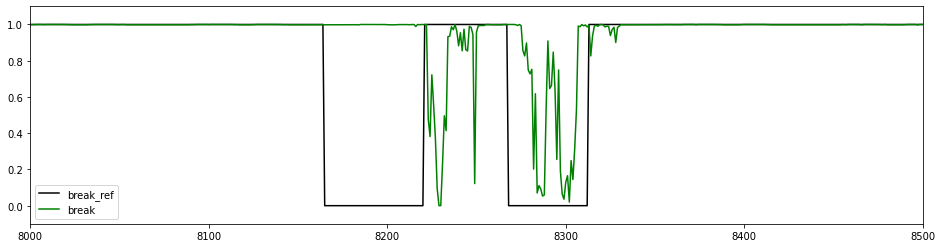

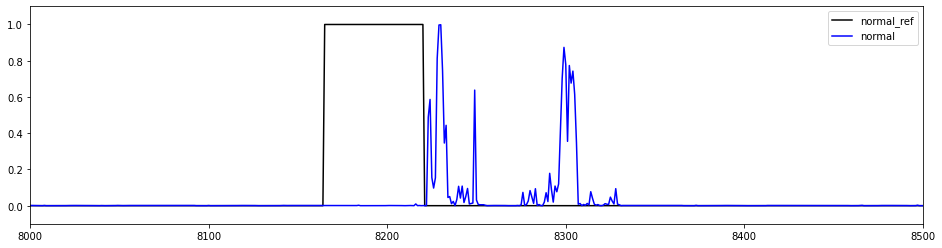

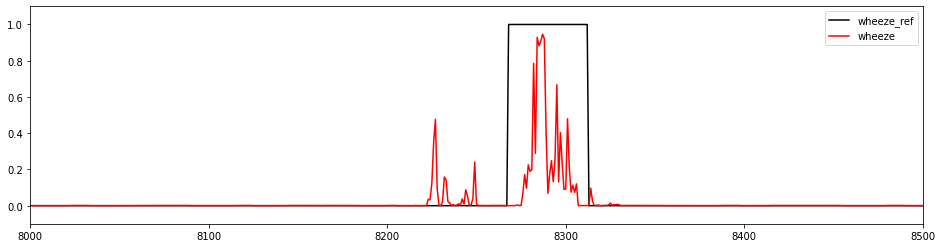

In [861]:
view_start = 8000
view_end = 8500

plt.figure(figsize=(16,4))
plt.plot(y_test_0, label='break_ref', color='black')
plt.plot(y_pred_0, label='break', color='g')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(y_test_1, label='normal_ref', color='black')
plt.plot(y_pred_1, label='normal', color='b')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(y_test_2, label='wheeze_ref', color='black')
plt.plot(y_pred_2, label='wheeze', color='r')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()

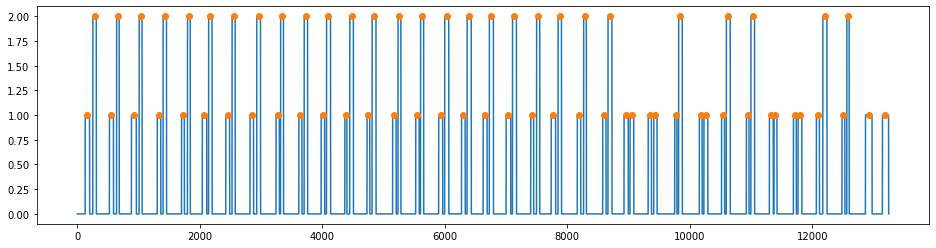

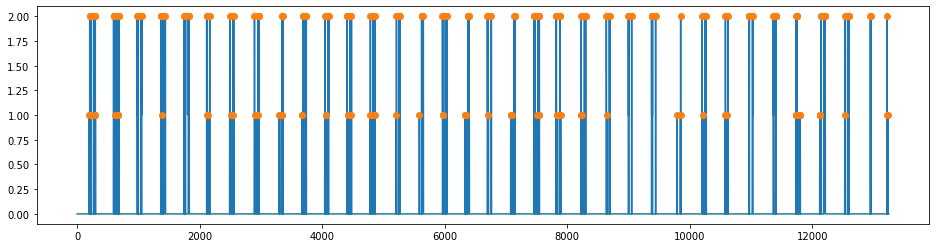

In [275]:
peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

In [276]:
peaks[0]

198

In [313]:
resp_list_index = []

ex_index = 0

# for peak_index in peaks:
    
#     if (peak_index - ex_peak_index) >= 100: 
#         resp_list.append([ex_peak_index, peak_index])
#     ex_peak_index = peak_index

for index, y_pred_categorical in enumerate(y_pred.argmax(axis=1)):
    
    if (y_pred_categorical) >= 1:
        
        if (index - ex_index) >= 100: 
            resp_list_index.append(ex_index)
            resp_list_index.append(index)
        
        ex_index = index

for reverse_index, y_pred_categorical in enumerate(reversed(y_pred.argmax(axis=1))):

    if (y_pred_categorical) >= 1:
          
        resp_list_index.append(len(y_pred.argmax(axis=1))-(reverse_index+1))
        resp_list_index = resp_list_index[1:]
        
        break

        
number = 0

for i in np.arange(len(resp_list_index)//2):
    
    number+=1
    
    start_index = resp_list_index[i*2:(i+1)*2][0]
    end_index = resp_list_index[i*2:(i+1)*2][1]
    
    prob_norm_in_resp = y_pred_1[start_index:end_index+1]    
    prob_wheeze_in_resp = y_pred_2[start_index:end_index+1]
    categorical_in_resp = y_pred.argmax(axis=1)[start_index:end_index+1]
    
    score = 0
    
    for pred_val in categorical_in_resp:
        
        if score == 3:
            break
        
        if pred_val == 2 :
            score += 1
        
        else :
            score = 0
    
    print('#', number, ':', 'score:', score, np.average(prob_norm_in_resp), np.average(prob_wheeze_in_resp), 
          np.std(prob_norm_in_resp), np.std(prob_wheeze_in_resp))

# 1 : score: 3 0.17392983 0.19225991 0.27430242 0.29942462
# 2 : score: 3 0.1707567 0.2384311 0.28711632 0.32320642
# 3 : score: 3 0.09104088 0.2256836 0.18930046 0.30970407
# 4 : score: 3 0.17766124 0.3471338 0.31400234 0.39161426
# 5 : score: 1 0.1956411 0.19520801 0.32568145 0.26332083
# 6 : score: 1 0.19536951 0.09241857 0.3348261 0.15128349
# 7 : score: 1 0.17356254 0.0759228 0.30970636 0.15534887
# 8 : score: 3 0.16447406 0.19185479 0.26421133 0.28963694
# 9 : score: 3 0.19052114 0.1522329 0.28328973 0.25179586
# 10 : score: 3 0.1868498 0.29615548 0.33155996 0.38393185
# 11 : score: 1 0.22448447 0.14776985 0.319418 0.23395127
# 12 : score: 1 0.14818548 0.12575491 0.2417857 0.1826605
# 13 : score: 3 0.32143953 0.19270094 0.3742888 0.29364514
# 14 : score: 3 0.11476759 0.1564422 0.23265024 0.2474281
# 15 : score: 3 0.1757853 0.25228173 0.31456986 0.34547818
# 16 : score: 3 0.13038306 0.2231297 0.25659975 0.29708943
# 17 : score: 0 0.32021827 0.20442396 0.35787573 0.280584
# 18 : sc

In [324]:
ref_count_label = wheeze_counter(y_test)

# 1 : score: 3 0.10820154 0.116665915 0.22037464 0.24039121
# 2 : score: 3 0.10586909 0.14372739 0.23556183 0.2720376
# 3 : score: 3 0.04572995 0.10710645 0.1324658 0.23310201
# 4 : score: 3 0.09530232 0.18423815 0.24052286 0.32716748
# 5 : score: 3 0.116053134 0.11379541 0.26354036 0.2195458
# 6 : score: 3 0.07253945 0.038131632 0.20901969 0.098309636
# 7 : score: 3 0.08574675 0.047541782 0.2215435 0.12084921
# 8 : score: 3 0.080620445 0.089286745 0.1939501 0.21478032
# 9 : score: 3 0.09800402 0.07915382 0.21701027 0.19100294
# 10 : score: 3 0.10376026 0.16275343 0.25733748 0.31321546
# 11 : score: 3 0.11104824 0.07312834 0.23735757 0.17020825
# 12 : score: 3 0.086019956 0.074402906 0.19048175 0.14789188
# 13 : score: 3 0.19242345 0.11532502 0.31828976 0.23848459
# 14 : score: 3 0.065694086 0.08596146 0.17227745 0.18922675
# 15 : score: 3 0.10250473 0.14406256 0.24631651 0.28137895
# 16 : score: 3 0.06835892 0.11138065 0.18382733 0.22868197
# 17 : score: 3 0.15372236 0.09454604 0.2842

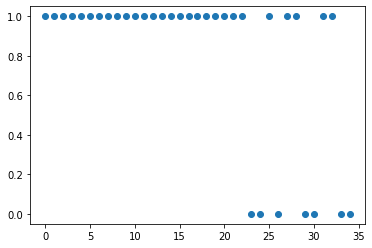

In [325]:
x = np.arange(len(ref_count_label))
plt.scatter(x, ref_count_label)

In [326]:
test_count_label = wheeze_counter(y_pred)

# 1 : score: 3 0.17392983 0.19225991 0.27430242 0.29942462
# 2 : score: 3 0.1707567 0.2384311 0.28711632 0.32320642
# 3 : score: 3 0.09104088 0.2256836 0.18930046 0.30970407
# 4 : score: 3 0.17766124 0.3471338 0.31400234 0.39161426
# 5 : score: 1 0.1956411 0.19520801 0.32568145 0.26332083
# 6 : score: 1 0.19536951 0.09241857 0.3348261 0.15128349
# 7 : score: 1 0.17356254 0.0759228 0.30970636 0.15534887
# 8 : score: 3 0.16447406 0.19185479 0.26421133 0.28963694
# 9 : score: 3 0.19052114 0.1522329 0.28328973 0.25179586
# 10 : score: 3 0.1868498 0.29615548 0.33155996 0.38393185
# 11 : score: 1 0.22448447 0.14776985 0.319418 0.23395127
# 12 : score: 1 0.14818548 0.12575491 0.2417857 0.1826605
# 13 : score: 3 0.32143953 0.19270094 0.3742888 0.29364514
# 14 : score: 3 0.11476759 0.1564422 0.23265024 0.2474281
# 15 : score: 3 0.1757853 0.25228173 0.31456986 0.34547818
# 16 : score: 3 0.13038306 0.2231297 0.25659975 0.29708943
# 17 : score: 0 0.32021827 0.20442396 0.35787573 0.280584
# 18 : sc

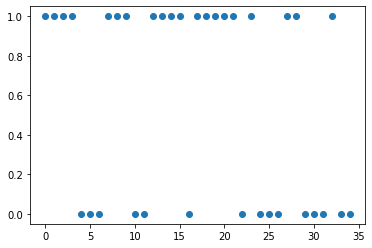

In [327]:
x = np.arange(len(test_count_label))
plt.scatter(x, test_count_label)

In [329]:
cm = confusion_matrix(test_count_label, ref_count_label, normalize='true')
print(cm)

[[0.4  0.6 ]
 [0.05 0.95]]


(100.0, 500.0)

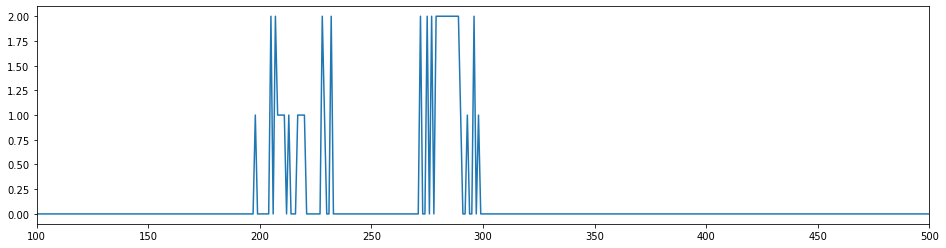

In [287]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred.argmax(axis=1))
plt.xlim(100,500)

In [255]:
print(len(resp_list))

70


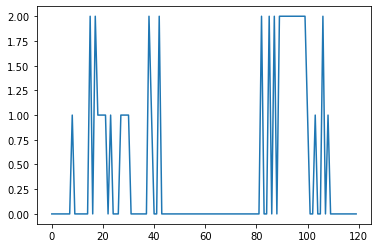

In [238]:
plt.plot(y_pred.argmax(axis=1)[190:310])

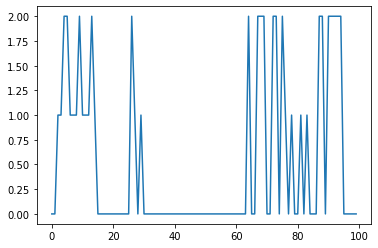

In [239]:
plt.plot(y_pred.argmax(axis=1)[590:690])

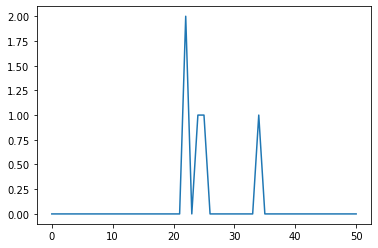

In [243]:
plt.plot(y_pred.argmax(axis=1)[13200:])

(0.0, 2000.0)

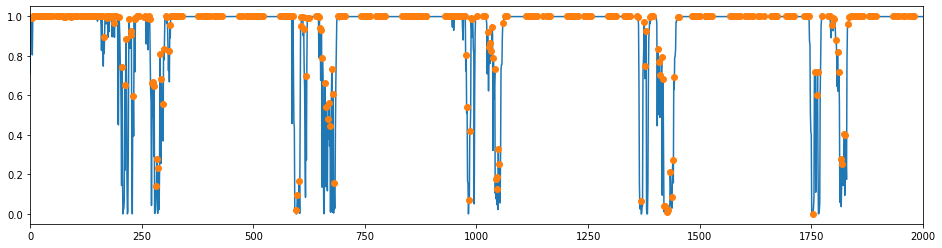

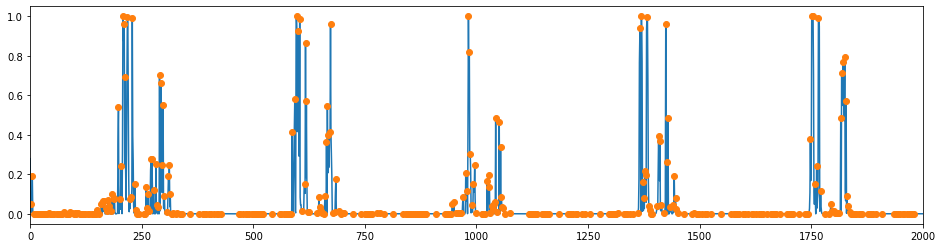

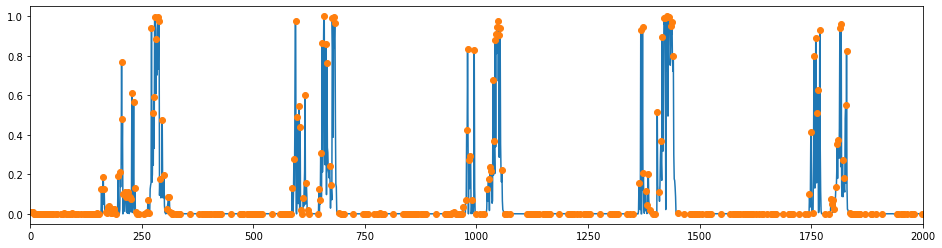

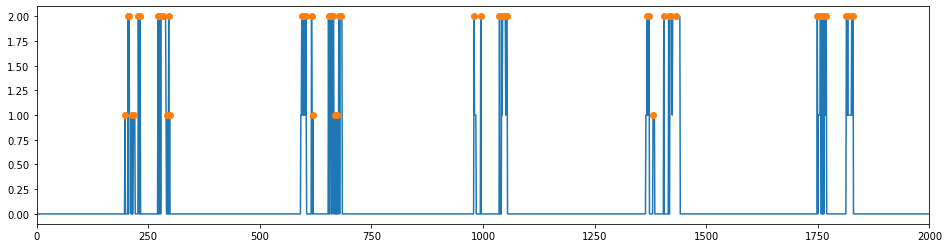

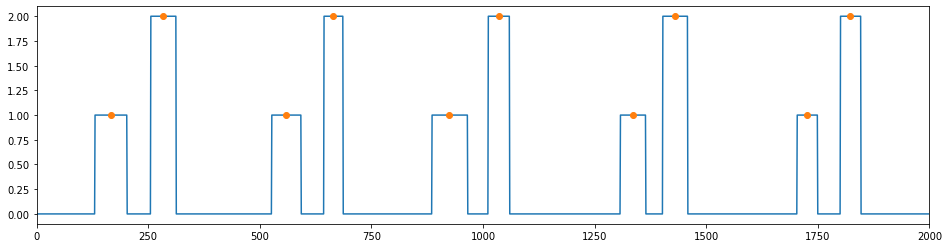

In [222]:
view_start = 2000 * 0
view_end = 2000 * 1

peaks, _ = find_peaks(y_pred_0)

plt.figure(figsize=(16,4))
plt.plot(y_pred_0)
plt.plot(peaks, y_pred_0[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(2000.0, 4000.0)

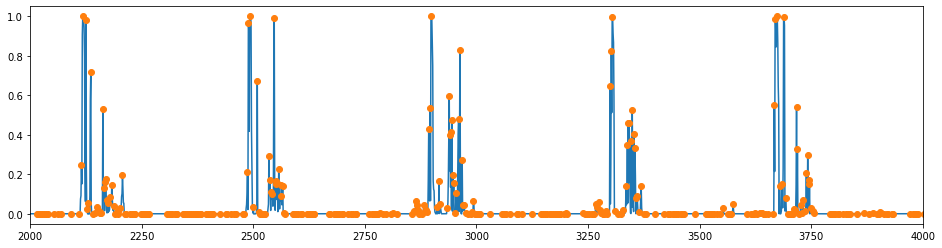

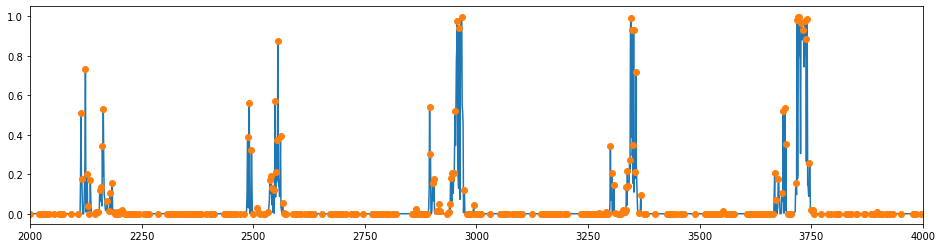

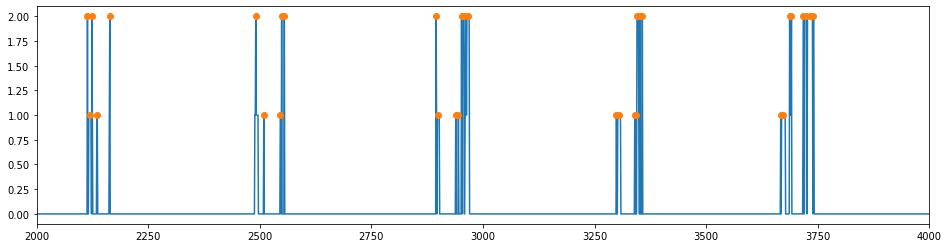

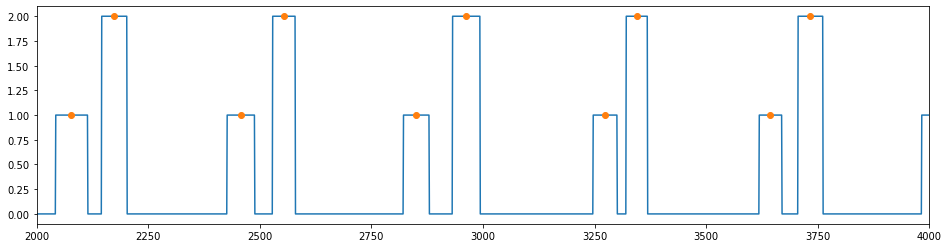

In [216]:
view_start = 2000 * 1
view_end = 2000 * 2

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(4000.0, 6000.0)

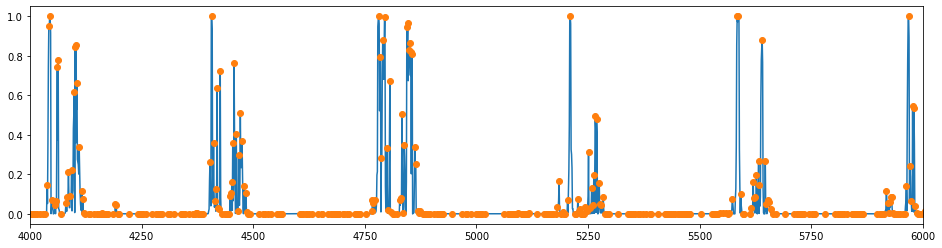

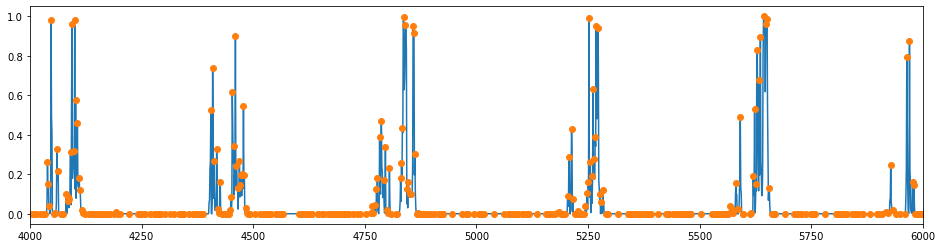

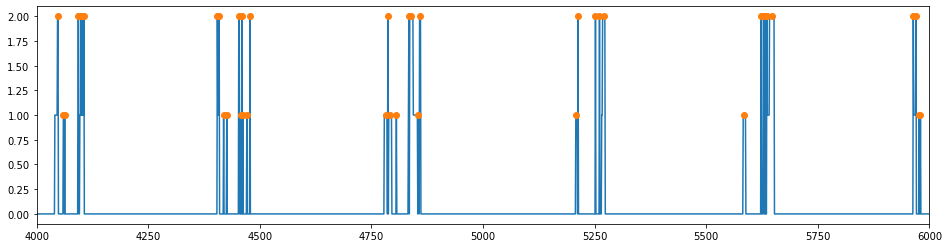

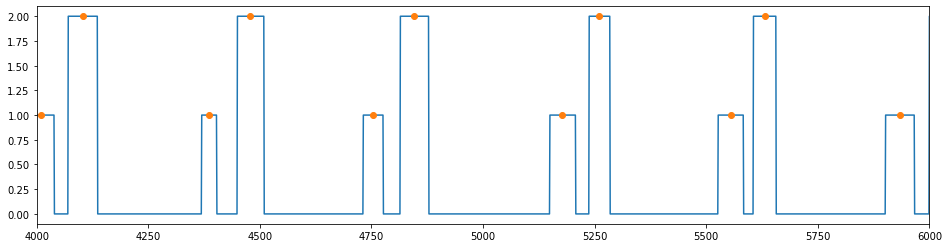

In [217]:
view_start = 2000 * 2
view_end = 2000 * 3

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(6000.0, 8000.0)

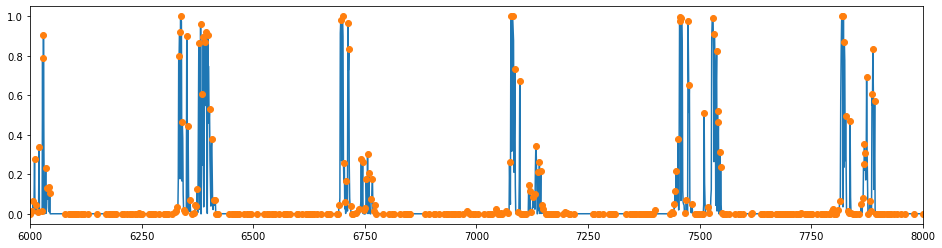

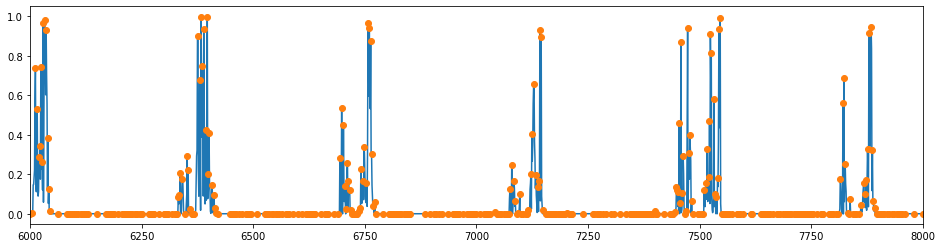

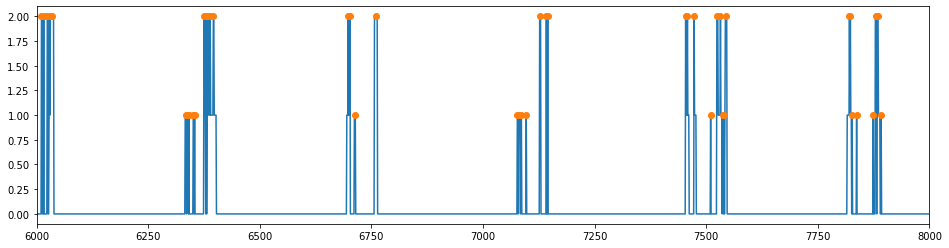

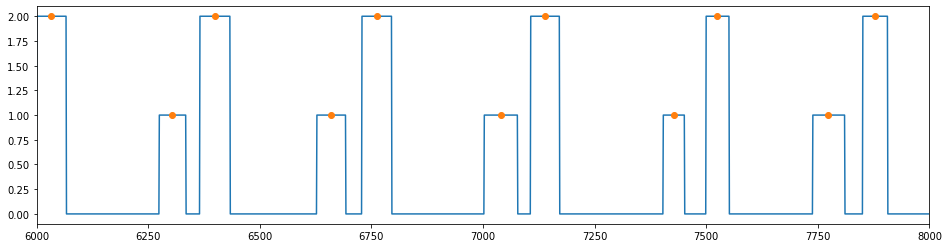

In [218]:
view_start = 2000 * 3
view_end = 2000 * 4

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(8000.0, 10000.0)

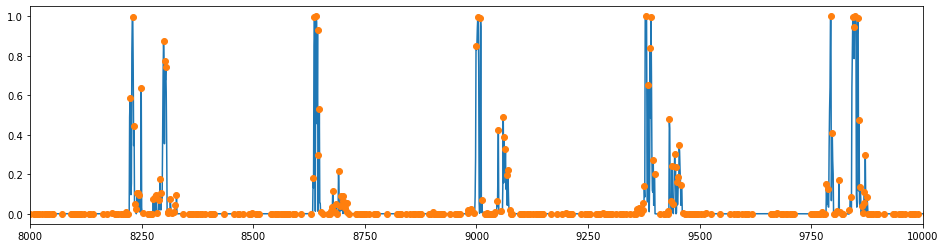

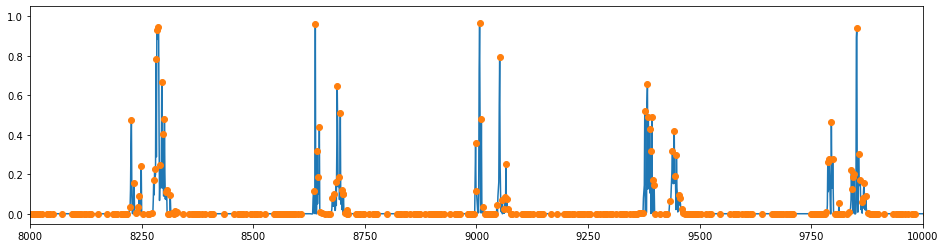

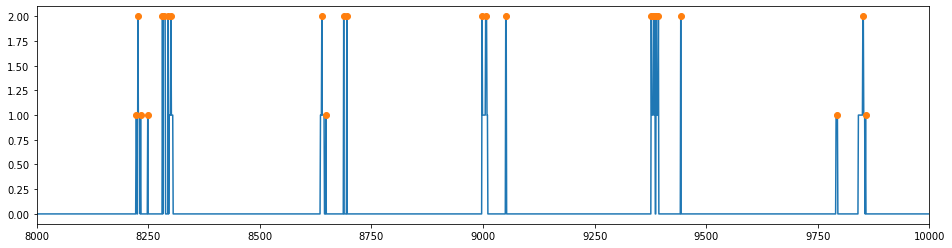

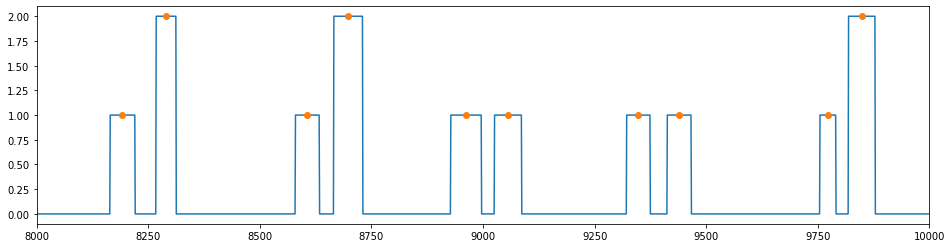

In [219]:
view_start = 2000 * 4
view_end = 2000 * 5

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(8900.0, 9125.0)

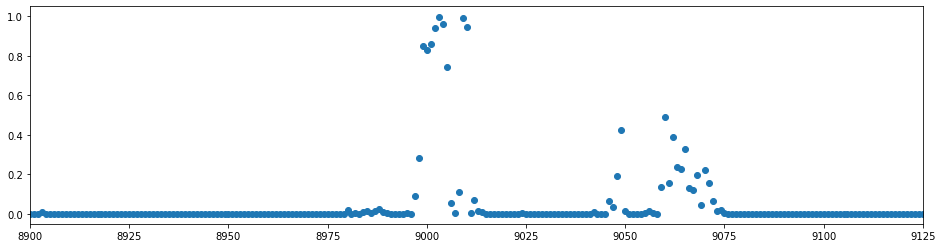

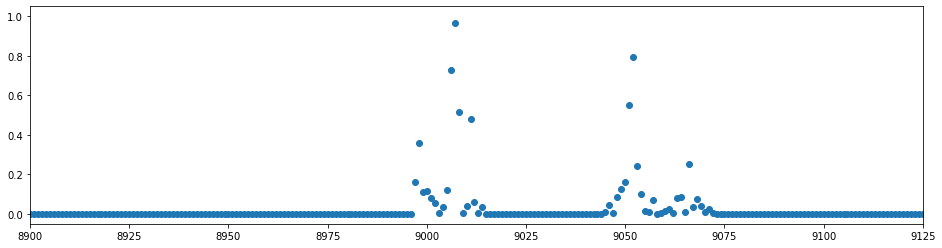

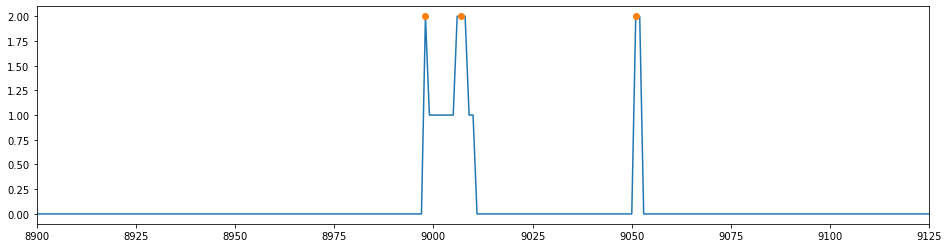

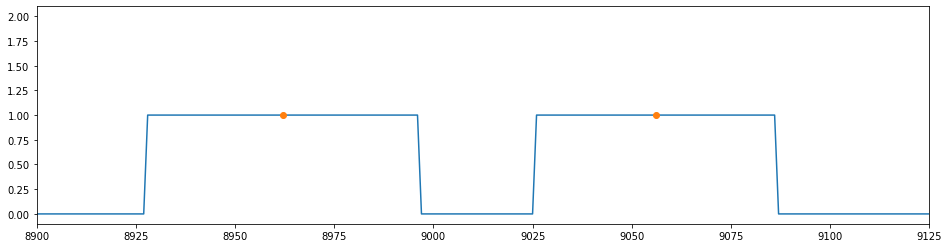

In [270]:
view_start = 8900
view_end = 9125

# peaks, _ = find_peaks(y_pred_1)
x = np.arange(len(y_pred_1))

plt.figure(figsize=(16,4))
plt.scatter(x, y_pred_1)
# plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


# peaks, _ = find_peaks(y_pred_1)
x = np.arange(len(y_pred_2))

plt.figure(figsize=(16,4))
plt.scatter(x, y_pred_2)
# plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

In [ ]:
view_start = 8900
view_end = 9125

# peaks, _ = find_peaks(y_pred_1)
x = np.arange(len(y_pred_1))

plt.figure(figsize=(16,4))
plt.scatter(x, y_pred_1)
# plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


# peaks, _ = find_peaks(y_pred_1)
x = np.arange(len(y_pred_2))

plt.figure(figsize=(16,4))
plt.scatter(x, y_pred_2)
# plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(10000.0, 12000.0)

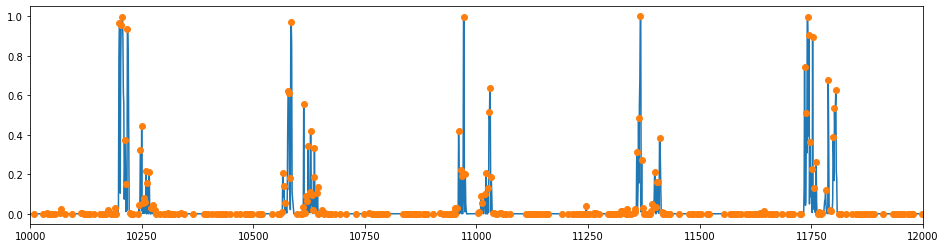

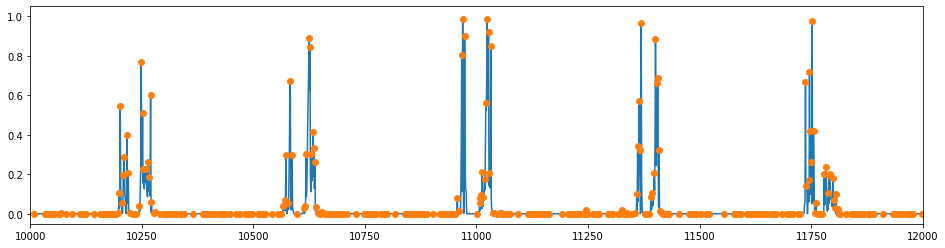

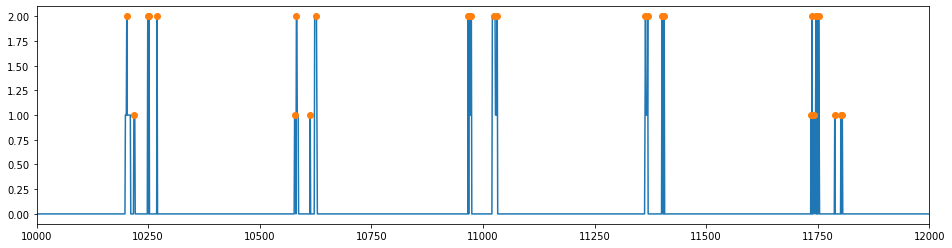

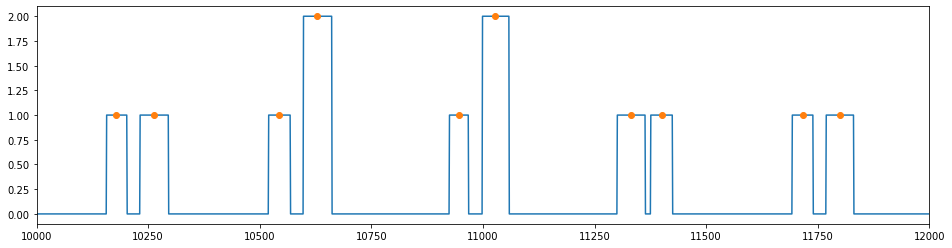

In [220]:
view_start = 2000 * 5
view_end = 2000 * 6

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

(12000.0, 14000.0)

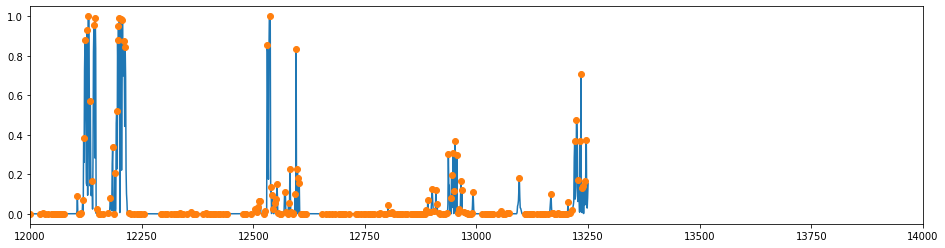

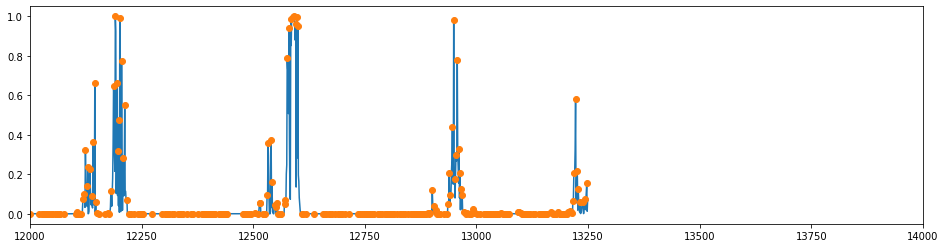

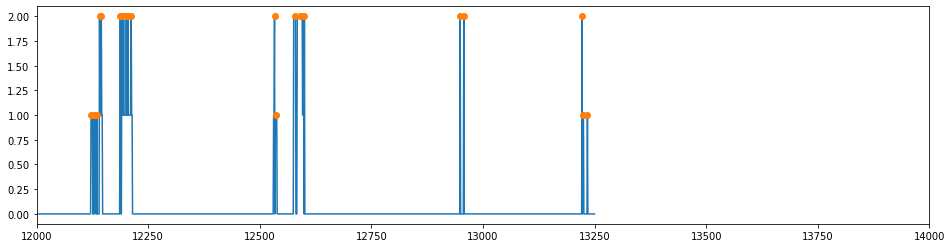

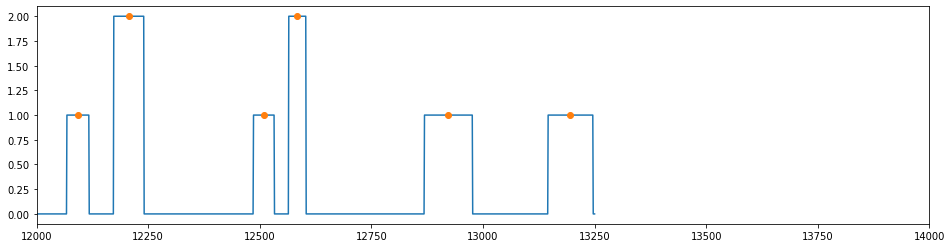

In [221]:
view_start = 2000 * 6
view_end = 2000 * 7

peaks, _ = find_peaks(y_pred_1)

plt.figure(figsize=(16,4))
plt.plot(y_pred_1)
plt.plot(peaks, y_pred_1[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred_2)

plt.figure(figsize=(16,4))
plt.plot(y_pred_2)
plt.plot(peaks, y_pred_2[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)


peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)

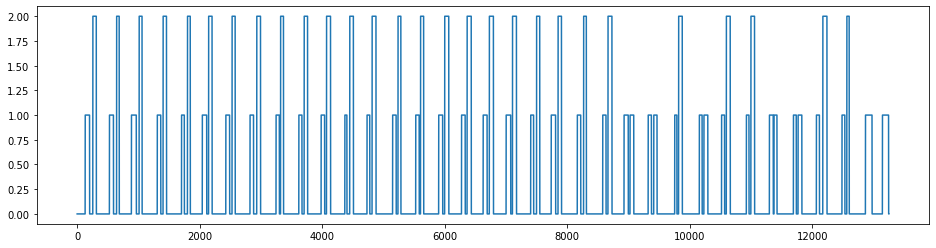

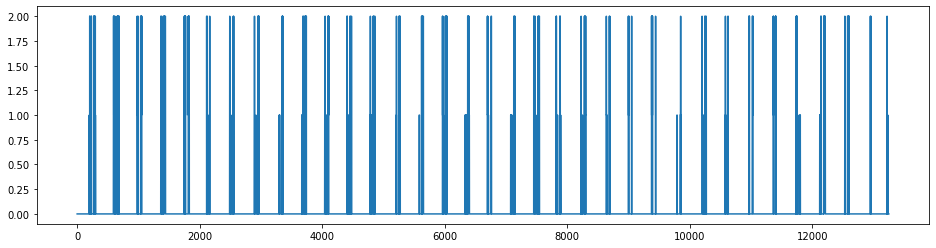

In [183]:
plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))

In [190]:
wheeze_per_resp_acc(y_pred.argmax(axis=1), y_test.argmax(axis=1))

#13: 1.6428571428571428
#27: 1.7142857142857142
#33: 2.0
#40: 1.8571428571428572
#50: 2.0
#55: 1.6
#60: 1.6
#68: 1.625
#75: 1.4285714285714286
#83: 1.75
#90: 1.7142857142857142
#100: 1.5
#108: 1.5
#113: 1.8
#119: 1.8333333333333333
#128: 1.7777777777777777
#139: 1.5454545454545454
#143: 1.75
#150: 1.4285714285714286
#159: 1.6666666666666667
#167: 1.5
#175: 1.625
#179: 1.75
#182: 2.0
#188: 2.0
#191: 1.3333333333333333
#196: 1.8
#200: 1.5
#205: 2.0
#210: 2.0
#220: 1.4
#232: 1.6666666666666667
#238: 1.8333333333333333
#240: 2.0
prediction
respiration: 34
wheeze: 30 normal 4
#0: 1.0
#1: 2.0
#2: 1.0
#3: 2.0
#4: 1.0
#5: 2.0
#7: 1.5
#9: 1.5
#11: 1.5
#13: 1.5
#14: 1.0
#15: 2.0
#17: 1.5
#19: 1.5
#21: 1.5
#23: 1.5
#25: 1.5
#27: 1.5
#29: 1.5
#31: 1.5
#33: 1.5
#34: 1.0
#35: 2.0
#37: 1.5
#39: 1.5
#40: 1.0
#41: 2.0
#43: 1.5
#45: 1.5
#47: 1.0
#49: 1.0
#51: 1.5
#53: 1.0
#55: 1.5
#57: 1.5
#59: 1.0
#61: 1.0
#62: 1.0
#63: 2.0
#65: 1.5
#66: 1.0
test
respiration: 41
wheeze: 28 normal 13


In [640]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/mamoori/test/s1_1_2'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['1_clinical(s1_1)_JJY_ISH_220723.txt',
 '1_clinical(s1_1)_JJY_ISH_220723.wav',
 '.ipynb_checkpoints']

In [641]:
ordered_test_file_list[:-1]

['1_clinical(s1_1)_JJY_ISH_220723.txt', '1_clinical(s1_1)_JJY_ISH_220723.wav']

In [642]:
t, t_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[1], sr = sample_rate)
# t = nr.reduce_noise(y=t, sr=sample_rate)
t_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[0], sep='\t', header=None)

In [643]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
label_ratio = 1

X_test, y_test = make_test_dataset_keras(test_file_path, ordered_test_file_list, n_mels, frame_sec, step_sec, label_ratio)

In [644]:
# model = load_model('saved_model/220706_1dcnn_blstm.h5')
model = load_model('saved_model/220711_1dcnn_blstm.h5')

In [645]:
y_pred = model.predict(X_test)

In [646]:
acc =accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1))
f1=f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')

roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)

acc: 0.5762353393578158
f1: 0.4346658673511104
roc_auc: 0.6462560134659286
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.60850957e-01 3.83937563e-02 7.55287009e-04]
 [9.25213675e-01 6.92663818e-02 5.51994302e-03]]


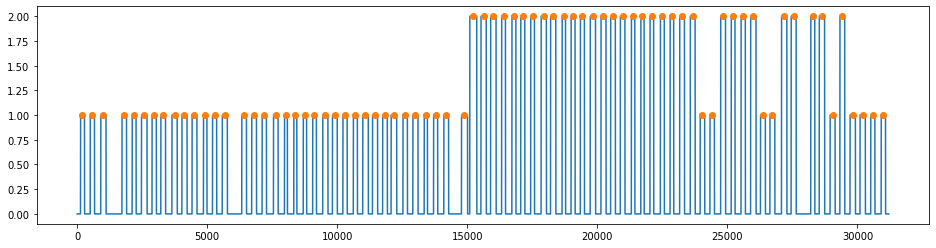

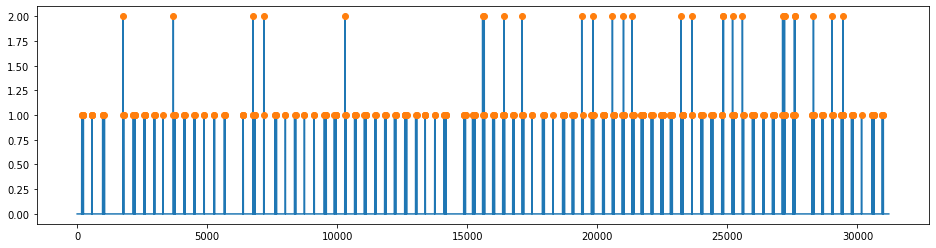

In [647]:
peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

In [648]:
ref_count_label = wheeze_counter_ref(y_test)

# 1 : score: 0 1.0 0.0 0.0 0.0
# 2 : score: 0 1.0 0.0 0.0 0.0
# 3 : score: 0 1.0 0.0 0.0 0.0
# 4 : score: 0 1.0 0.0 0.0 0.0
# 5 : score: 0 1.0 0.0 0.0 0.0
# 6 : score: 0 1.0 0.0 0.0 0.0
# 7 : score: 0 1.0 0.0 0.0 0.0
# 8 : score: 0 1.0 0.0 0.0 0.0
# 9 : score: 0 1.0 0.0 0.0 0.0
# 10 : score: 0 1.0 0.0 0.0 0.0
# 11 : score: 0 1.0 0.0 0.0 0.0
# 12 : score: 0 1.0 0.0 0.0 0.0
# 13 : score: 0 1.0 0.0 0.0 0.0
# 14 : score: 0 1.0 0.0 0.0 0.0
# 15 : score: 0 1.0 0.0 0.0 0.0
# 16 : score: 0 1.0 0.0 0.0 0.0
# 17 : score: 0 1.0 0.0 0.0 0.0
# 18 : score: 0 1.0 0.0 0.0 0.0
# 19 : score: 0 1.0 0.0 0.0 0.0
# 20 : score: 0 1.0 0.0 0.0 0.0
# 21 : score: 0 1.0 0.0 0.0 0.0
# 22 : score: 0 1.0 0.0 0.0 0.0
# 23 : score: 0 1.0 0.0 0.0 0.0
# 24 : score: 0 1.0 0.0 0.0 0.0
# 25 : score: 0 1.0 0.0 0.0 0.0
# 26 : score: 0 1.0 0.0 0.0 0.0
# 27 : score: 0 1.0 0.0 0.0 0.0
# 28 : score: 0 1.0 0.0 0.0 0.0
# 29 : score: 0 1.0 0.0 0.0 0.0
# 30 : score: 0 1.0 0.0 0.0 0.0
# 31 : score: 0 1.0 0.0 0.0 0.0
# 32 : score: 0 1

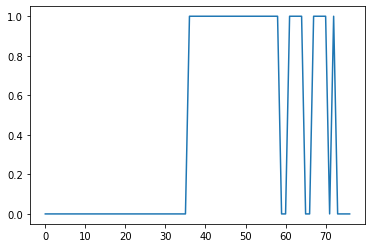

In [653]:
plt.plot(ref_count_label)

(0.0, 10000.0)

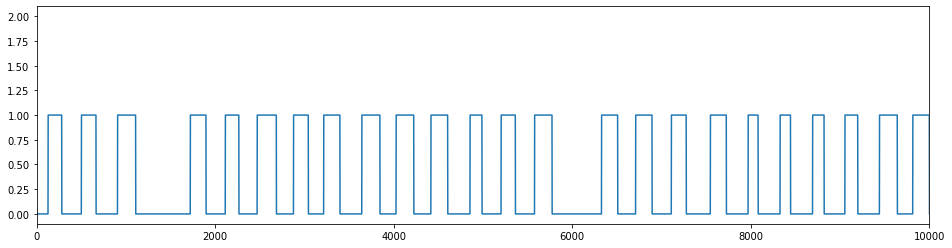

In [649]:
plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.xlim(0,10000)

In [650]:
test_count_label = wheeze_counter_test(y_pred)

# 1 : score: 0 0.17731944 0.022928631 0.2512123 0.038576525
# 2 : score: 0 0.39747182 0.03995256 0.3553296 0.038207058
# 3 : score: 0 0.08974404 0.012205712 0.2133515 0.040684246
# 4 : score: 0 0.32153758 0.06312686 0.36288577 0.1717165
# 5 : score: 0 0.1982795 0.019505477 0.30540025 0.03209188
# 6 : score: 0 0.15050043 0.0054725525 0.27458188 0.0146185085
# 7 : score: 0 0.15361203 0.004813448 0.29341936 0.012349955
# 8 : score: 0 0.90102315 0.04574044 0.095807016 0.028583173
# 9 : score: 0 0.15209381 0.028003326 0.2782872 0.11221153
# 10 : score: 0 0.1607734 0.005828361 0.29192668 0.012749217
# 11 : score: 0 0.124252155 0.004485413 0.28970072 0.009884802
# 12 : score: 0 0.6447317 0.04355149 0.31103668 0.0264962
# 13 : score: 0 0.3072505 0.0091474205 0.41805512 0.008005664
# 14 : score: 0 0.30978745 0.041009855 0.38970917 0.052471675
# 15 : score: 0 0.44895178 0.053509515 0.3459151 0.081393704
# 16 : score: 0 0.19016509 0.02911851 0.28376368 0.09717981
# 17 : score: 0 0.61242425 0.1186

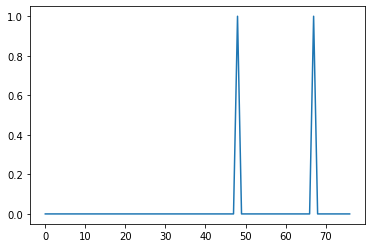

In [652]:
plt.plot(test_count_label)

(30000.0, 40000.0)

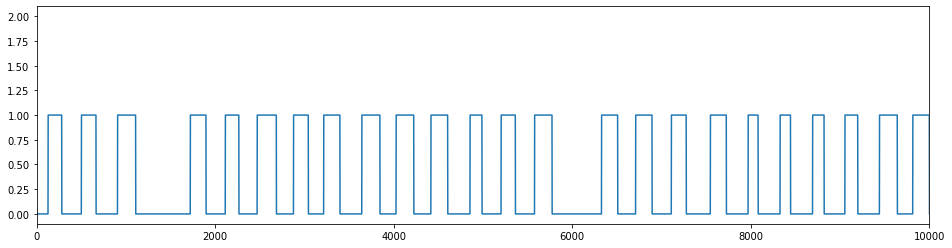

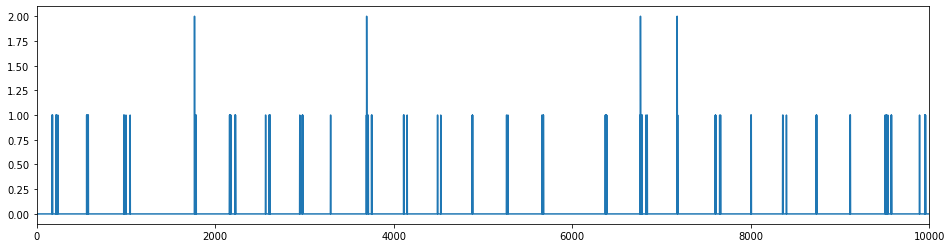

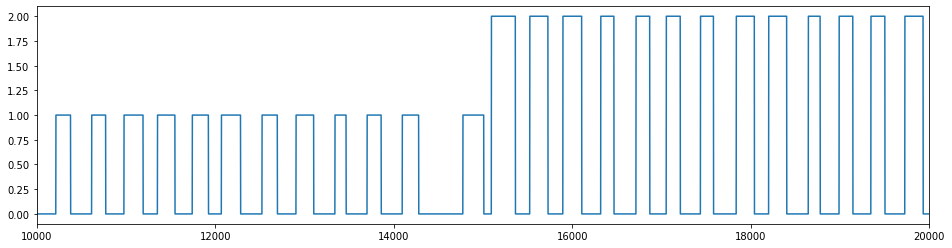

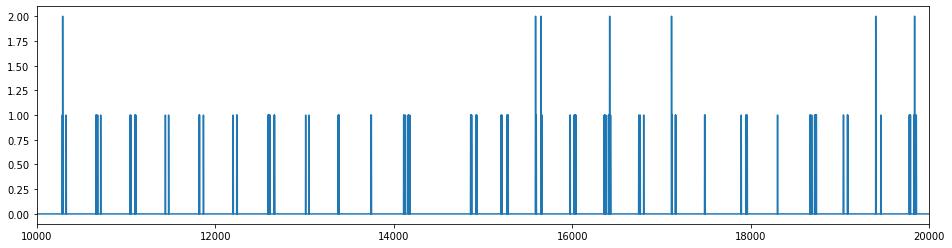

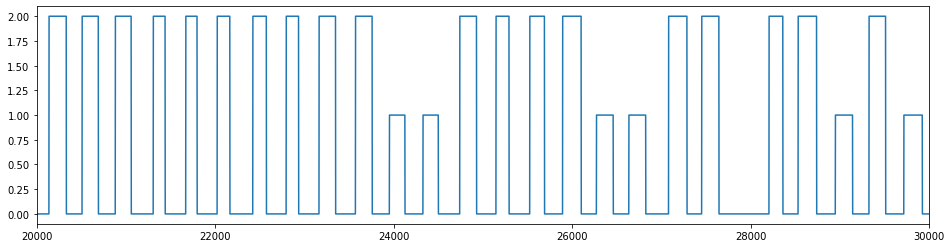

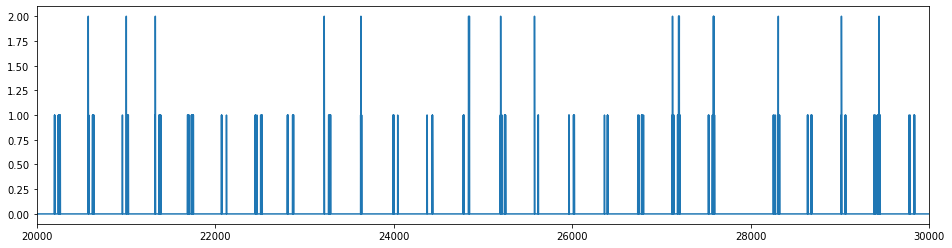

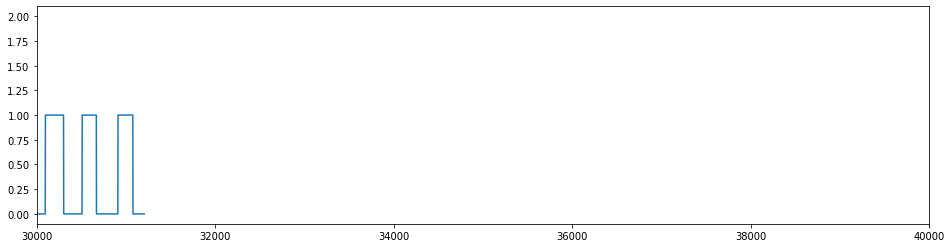

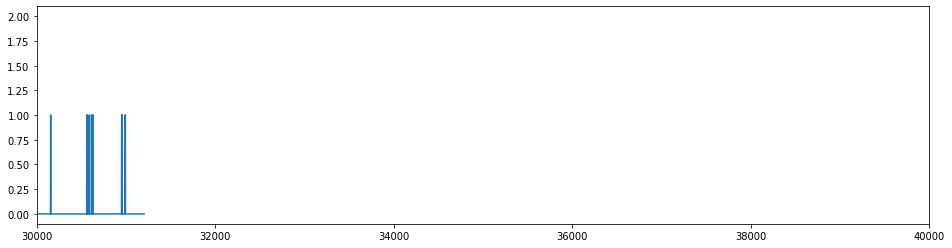

In [630]:
plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.xlim(0,10000)

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.xlim(0,10000)

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.xlim(10000,20000)

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.xlim(10000,20000)

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.xlim(20000,30000)

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.xlim(20000,30000)


plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.xlim(30000,40000)

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.xlim(30000,40000)

In [654]:
cm = confusion_matrix(ref_count_label, test_count_label, normalize='true')
print(cm)

[[1.     0.    ]
 [0.9375 0.0625]]


In [655]:
cm = confusion_matrix(ref_count_label, test_count_label)
print(cm)

[[45  0]
 [30  2]]


In [597]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/mamoori/test/making'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['.ipynb_checkpoints',
 'validation_data_making.txt',
 'validation_data_making.wav']

In [598]:
orderd_test_file_list = ordered_test_file_list[1:]

orderd_test_file_list

['validation_data_making.txt', 'validation_data_making.wav']

In [599]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
label_ratio = 1

X_test, y_test = make_test_dataset_keras(test_file_path, ordered_test_file_list, n_mels, frame_sec, step_sec, label_ratio)

In [600]:
# model = load_model('saved_model/220706_1dcnn_blstm.h5')
model = load_model('saved_model/220711_1dcnn_blstm.h5')

In [601]:
y_pred = model.predict(X_test)

In [602]:
acc =accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1))
f1=f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')

roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)

acc: 0.46062464073577314
f1: 0.3751681886077406
roc_auc: 0.6966046119401038
[[1.         0.         0.        ]
 [0.58386412 0.32908705 0.08704883]
 [0.82756917 0.09486166 0.07756917]]


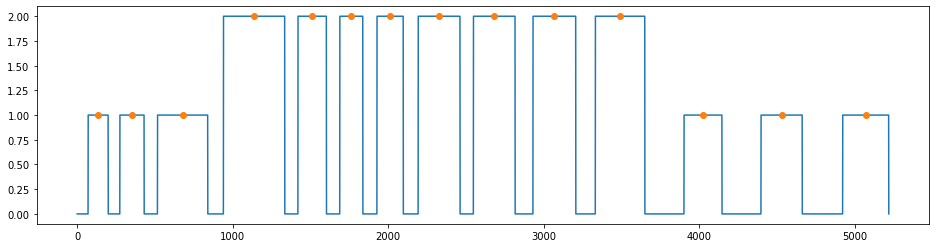

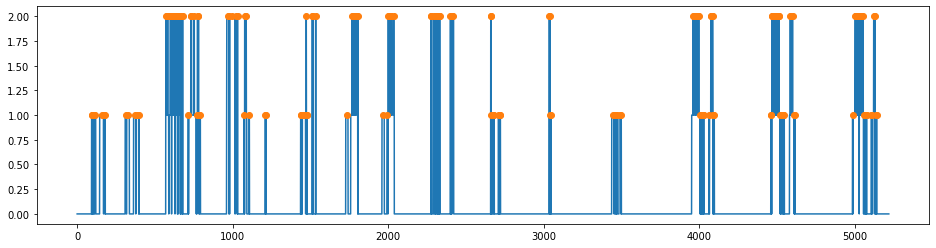

In [603]:
peaks, _ = find_peaks(y_test.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_test.argmax(axis=1))
plt.plot(peaks, y_test.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

peaks, _ = find_peaks(y_pred.argmax(axis=1))

plt.figure(figsize=(16,4))
plt.plot(y_pred.argmax(axis=1))
plt.plot(peaks, y_pred.argmax(axis=1)[peaks], "o")
# plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)

In [604]:
ref_count_label = wheeze_counter_ref(y_test)

# 1 : score: 0 1.0 0.0 0.0 0.0
# 2 : score: 0 1.0 0.0 0.0 0.0
# 3 : score: 0 1.0 0.0 0.0 0.0
# 4 : score: 3 0.0 1.0 0.0 0.0
# 5 : score: 3 0.0 1.0 0.0 0.0
# 6 : score: 3 0.0 1.0 0.0 0.0
# 7 : score: 3 0.0 1.0 0.0 0.0
# 8 : score: 3 0.0 1.0 0.0 0.0
# 9 : score: 3 0.0 1.0 0.0 0.0
# 10 : score: 3 0.0 1.0 0.0 0.0
# 11 : score: 3 0.0 1.0 0.0 0.0
# 12 : score: 0 1.0 0.0 0.0 0.0
# 13 : score: 0 1.0 0.0 0.0 0.0
# 14 : score: 0 1.0 0.0 0.0 0.0


In [605]:
test_count_label = wheeze_counter_test(y_pred)

# 1 : score: 0 0.5006606 0.0501061 0.3500712 0.08824781
# 2 : score: 3 0.4318418 0.24370472 0.36739677 0.28905457
# 3 : score: 3 0.07784313 0.44736475 0.19041398 0.43728793
# 4 : score: 0 0.40030745 0.043702576 0.16722305 0.010569306
# 5 : score: 3 0.33592704 0.13159828 0.38400123 0.19624145
# 6 : score: 3 0.43397334 0.2826121 0.3751296 0.36582407
# 7 : score: 3 0.43740013 0.2882243 0.38515866 0.37437576
# 8 : score: 3 0.004049506 0.30416307 0.01238422 0.28661108
# 9 : score: 0 0.25984997 0.037342872 0.27515894 0.104800135
# 10 : score: 0 0.32329872 0.19982253 0.21986993 0.20926979
# 11 : score: 0 0.5322955 0.04318995 0.29651508 0.06451137
# 12 : score: 3 0.46384686 0.21397677 0.3652093 0.29696795
# 13 : score: 3 0.4797438 0.18296507 0.3538708 0.269434
# 14 : score: 3 0.47104004 0.1903687 0.3528203 0.26783097
